<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/PP_M3_House_Prices_Advance_Regression_Techniques_and_HyperParameter_Tuning(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 Assignment 1: House Prices (Kaggle)

### Author: Pankaj Pant











# Project Details

Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  


**Requirements**

 - Conduct your analysis using a cross-validation design.
 - Conduct / improve upon previous EDA.
 - Build models with many variables.
 - Transform and feature engineer as appropriate.
 - Build at a minimum the following regression models.
    - Lasso
    - Ridge
    - ElasticNet
 - Conduct hyperparameter tuning for the ElasticNet.
 - Evaluate performance of the model using the Kaggle metric upon which  - your scores are evaluated.
 - Submit at least two models to Kaggle.com for evaluation. Provider your Kaggle.com user name and screen snapshots of your Kaggle scores.









#Importing Packages

In [ ]:
!pip install pwlf

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import pwlf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV



%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#cd nbconvert

In [ ]:
#!pip install -e .

In [ ]:
#!apt-get install pandoc


In [ ]:
#!apt-get update
#!apt-get install inkscape
#!add-apt-repository universe
#!add-apt-repository ppa:inkscape.dev/stable
#!apt-get update
#!apt install inkscape

# Ingestion
### Connect to google drive and import training and test data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W2"

total 3550
-rw------- 1 root root   13370 Dec 16  2019  data_description.txt
-rw------- 1 root root     143 Jan 17 06:05 'PP_M2_A1_House_Prices_Regression_Techniques(Kaggle).gdoc'
-rw------- 1 root root 2675921 Jan 23 18:26 'PP_M2_A1_House_Prices_Regression_Techniques(Kaggle).ipynb'
-rw------- 1 root root   31939 Dec 16  2019  sample_submission.csv
-rw------- 1 root root  451405 Dec 16  2019  test.csv
-rw------- 1 root root  460676 Dec 16  2019  train.csv


In [ ]:
#df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MSDS-422/W1-files/house-prices-advanced-regression-techniques/train.csv')
#df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MSDS-422/W1-files/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
#Generalize the file path 
w1_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W2"

In [ ]:
#training dataframe
train_df = pd.read_csv(w1_files+"/train.csv")

#test dataframe
test_df = pd.read_csv(w1_files+"/test.csv")

In [ ]:
# EDA Step1: Analyze shape, info and describe the dataset and check for NULLs
print('shape:---',train_df.shape)
print('\n\n',train_df.info())

shape:--- (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

In [ ]:
print('shape:---',test_df.shape)
print('\n\n',test_df.info())

shape:--- (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   


<font color='skyblue'>Training dataset has 1460 rows and 81 columns while test data has 1459 records and 80 columns. The SalePrice column is not present in testing data. </font>

<font color='skyblue'>Let's anaylze the training dataset</font>

In [ ]:
# describe

train_df.describe()

print('\n********Describe both numerical and non-numeric (categorical) variables********\n')

train_df.describe(include = "all")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



********Describe both numerical and non-numeric (categorical) variables********



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [ ]:
#finding fields with NULL values

train_df.isnull().sum()
print('\n\n',train_df.info())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Find total null values and null %
total_null = train_df.isnull().sum().sort_values(ascending=False)

null_per = (total_null/train_df.isnull().count()).sort_values(ascending=False)

null_stats = pd.concat([total_null, null_per, train_df.dtypes], axis=1, keys=['Total_NULL', 'NULL_Percentage', 'DType'])
type(null_stats)
#null_stats.head(10)
train_cat_null = null_stats[(null_stats.NULL_Percentage > 0.0) & (null_stats.DType == "object")]

train_num_null = null_stats[(null_stats.NULL_Percentage > 0.0) & (null_stats.DType != "object")]


pandas.core.frame.DataFrame

There are a few columns with NULL values. We can list the top 10 columns with null value. We can handle NULL value in two ways:


1.   Remove rows with missing value
2.   Impute Missing Values




In [ ]:
total_null = test_df.isnull().sum().sort_values(ascending=False)

null_per = (total_null/test_df.isnull().count()).sort_values(ascending=False)

null_stats = pd.concat([total_null, null_per, test_df.dtypes], axis=1, keys=['Total_NULL', 'NULL_Percentage', 'DType'])

null_stats.head
test_cat_null = null_stats[(null_stats.NULL_Percentage > 0.0) & (null_stats.DType == "object")]

test_num_null = null_stats[(null_stats.NULL_Percentage > 0.0) & (null_stats.DType != "object")]

<bound method NDFrame.head of                Total_NULL  NULL_Percentage    DType
PoolQC               1456         0.997944   object
MiscFeature          1408         0.965045   object
Alley                1352         0.926662   object
Fence                1169         0.801234   object
FireplaceQu           730         0.500343   object
LotFrontage           227         0.155586  float64
GarageCond             78         0.053461   object
GarageQual             78         0.053461   object
GarageYrBlt            78         0.053461  float64
GarageFinish           78         0.053461   object
GarageType             76         0.052090   object
BsmtCond               45         0.030843   object
BsmtQual               44         0.030158   object
BsmtExposure           44         0.030158   object
BsmtFinType1           42         0.028787   object
BsmtFinType2           42         0.028787   object
MasVnrType             16         0.010966   object
MasVnrArea             15         

In [ ]:
# Replace NaN with 0 for numerical values

for i in train_num_null.index:
    train_df[i].fillna(0)

train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mode().iloc[0])
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mode().iloc[0])
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mode().iloc[0])



train_df.isnull().sum()
  
#donot impute FireplaceQu if no fireplace

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:

for i in train_num_null.index:
    test_df[i].fillna(0)

test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mode().iloc[0])
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mode().iloc[0])
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode().iloc[0])



test_df.dropna()
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mode().iloc[0])
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mode().iloc[0])
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mode().iloc[0])
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mode().iloc[0])
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode().iloc[0])
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode().iloc[0])
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mode().iloc[0])
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mode().iloc[0])
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mode().iloc[0])


test_df.isnull().sum()

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

0       1961.0
1       1958.0
2       1997.0
3       1998.0
4       1992.0
         ...  
1454       0.0
1455    1970.0
1456    1960.0
1457       0.0
1458    1993.0
Name: GarageYrBlt, Length: 1459, dtype: float64

0         0.0
1       108.0
2         0.0
3        20.0
4         0.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458     94.0
Name: MasVnrArea, Length: 1459, dtype: float64

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          0
BsmtFinType2       42
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Replace NaN with NA (not applicable) for categorical values

for i in train_cat_null.index:
    train_df[i].fillna('None',inplace=True)

#for i in test_cat_null.index:
    #test_df[i].fillna('None',inplace=True)
  
#donot impute FireplaceQu if no fireplace

In [ ]:
# Replace NaN with NA (not applicable) for categorical values

for i in test_cat_null.index:
    test_df[i].fillna('None',inplace=True)

In [ ]:
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
SaleCondition,0.0,0.0
SaleType,0.0,0.0
RoofStyle,0.0,0.0
RoofMatl,0.0,0.0
Exterior1st,0.0,0.0


In [ ]:
#
#for i in train_num_null.index:
  #print(i, train_df[i].mean())
  #train_df[i].fillna(train_df[i].mean(),inplace=True)

#for i in test_num_null.index:
  #print(i, test_df[i].mean())
  #test_df[i].fillna(test_df[i].mean(),inplace=True)

In [ ]:
#Verify NULL values in the dataset
train_df.isnull().sum().sum()

print("\n")
test_df.isnull().sum().sum()

0

0

In [ ]:
# Drop records with most of the values as None
train_df = train_df.drop(['Alley', 'MasVnrType', 'FireplaceQu' ,'PoolQC' ,'Fence', 'MiscFeature'], axis=1)
train_df.isin(['None']).sum(axis=0)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [ ]:
test_df = test_df.drop(['Alley', 'MasVnrType', 'FireplaceQu' ,'PoolQC' ,'Fence', 'MiscFeature'], axis=1)
test_df.isin(['None']).sum(axis=0)

Id                0
MSSubClass        0
MSZoning          4
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        0
BsmtFinType2     42
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [ ]:
# Identify categorical and numerical variables using Dtype column from .info() output

non_object = train_df.dtypes[train_df.dtypes != "object"].index
#print("Number of Numerical features: ", len(non_object))

objects = train_df.dtypes[train_df.dtypes == "object"].index
#print("Number of Cateforical features: ", len(objects))



num_fields = []
cat_fields = []


for i in range(len(non_object)):
  num_fields.append(non_object[i])

for i in range(len(objects)):
  cat_fields.append(objects[i])



num_fields.remove("YrSold")
num_fields.remove("YearBuilt")
num_fields.remove("YearRemodAdd")
cat_fields.append("YrSold")
cat_fields.append("YearBuilt")
cat_fields.append("YearRemodAdd")


print('\n')
print("Number of Numerical features: ",len(num_fields))
print('\n')
print("Number of Categorical features: ",len(cat_fields))

#cat_var = ['YearBuilt', 'YearRemodAdd', 'YrSold' ]
#num_fields.remove('YearRemodAdd')
#cat_fields.append('YrSold')



Number of Numerical features:  35


Number of Categorical features:  40


# **EDA**
<font color='lightblue'>We will apply a few EDA techniques:


1.   “Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.”
https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/
2.   Data Visualization



</font>

### <font color='lightblue'></font>

In [ ]:
data = []
for i in num_fields:
  data.append([i, round(train_df[i].skew(),2), round(train_df[i].kurt(),2)])

df_sk = pd.DataFrame(data, columns=['Num_Field','Skewness','Kurtosis'])
df_sk.sort_values(by= ['Skewness'],ascending=False)

,Num_Field,Skewness,Kurtosis
32,MiscVal,24.48,701.00
31,PoolArea,14.83,223.27
3,LotArea,12.21,203.24
29,3SsnPorch,10.30,123.66
13,LowQualFinSF,9.01,83.23
20,KitchenAbvGr,4.49,21.53
8,BsmtFinSF2,4.26,20.11
30,ScreenPorch,4.12,18.44
16,BsmtHalfBath,4.10,16.40
28,EnclosedPorch,3.09,10.43


For skewness, if the value is greater than + 1.0, the distribution is right skewed. If the value is less than -1.0, the distribution is left skewed. For kurtosis, if the value is greater than + 1.0, the distribution is leptokurtik. If the value is less than -1.0, the distribution is platykurtik.

Skewness: 14.828374
Kurtosis: 223.268499
Skewness: -0.719292
Kurtosis: -0.362577


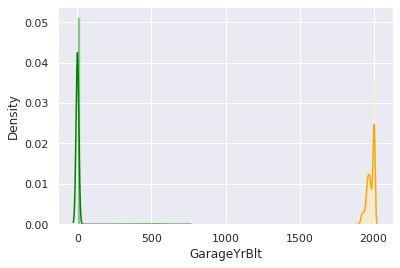

In [ ]:
# Let's plot the histogram for variable with skewness greater than 1.0 and also close to -1


#skewness and kurtosis
print("Skewness: %f" % train_df['PoolArea'].skew())
print("Kurtosis: %f" % train_df['PoolArea'].kurt())

sns.distplot(train_df['PoolArea'], color='green');

#skewness and kurtosis
print("Skewness: %f" % train_df['GarageYrBlt'].skew())
print("Kurtosis: %f" % train_df['GarageYrBlt'].kurt())

sns.distplot(train_df['GarageYrBlt'], color='orange');

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([  0,   0,   0, ..., 576, 648, 738])),
 (8.026637228673636, 2.7589041095890425, 0.19945061336501688))

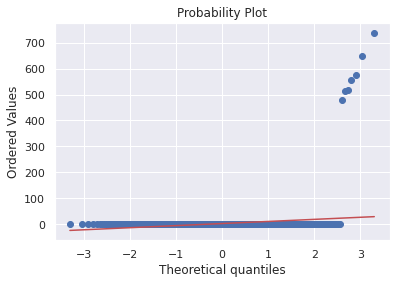

In [ ]:
stats.probplot(x=train_df['PoolArea'], dist=stats.norm(), plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

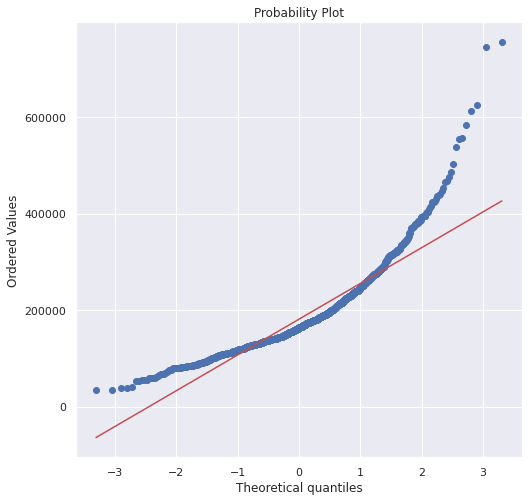

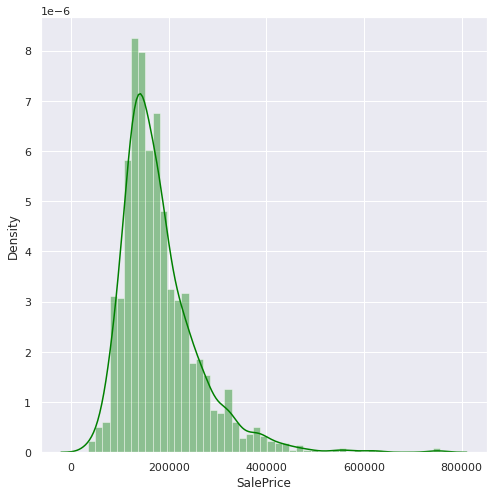

In [ ]:
# Review salesprice distribution
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
#fig, axes = plt.subplots(1, 2)
stats.probplot(x=train_df["SalePrice"], dist=stats.norm(), plot=plt)
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
sns.distplot(train_df['SalePrice'], color='green');
plt.show()

#train_df["SalePrice"].head()


We can identify the skewness in the train data and SalePrice using distribution plot or Q-Q plot.

SalePrice distribution is right skewed and most of the house priced between 100-400K, while there are very few around 600 - 800K.

Now we will review the correlation of SalesPrice with other fields to find the fields with most impact on the SalesPrice

##**Feature creation**

In [ ]:
# Reference code: https://www.kaggle.com/chanakyavivekkapoor/house-price-prediction#NULL-Values



train_df['HasPool'] = train_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['Has2ndFloor'] = train_df['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
train_df['HasGarage'] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasBsmt'] = train_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasFireplace'] = train_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['Total_Bathrooms'] = (train_df['FullBath'] + (0.5 * train_df['HalfBath']) +
                                   train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath']))
    
train_df['Total_porch_sf'] = (train_df['OpenPorchSF'] + train_df['3SsnPorch'] +
                                  train_df['EnclosedPorch'] + train_df['ScreenPorch'])

# Add years since remodel
train_df['YearsSinceRemodel'] = train_df['YrSold'].astype(int) - train_df['YearRemodAdd'].astype(int)



num_fields.append("HasPool")
num_fields.append("Has2ndFloor")
num_fields.append("HasGarage")
num_fields.append("HasBsmt")
num_fields.append("HasFireplace")
num_fields.append("TotalSF")
num_fields.append("Total_Bathrooms")


corr = train_df[num_fields].corr()
corrl = corr.nlargest(len(num_fields), 'SalePrice')['SalePrice']
#print(strng_corr.iloc[1])
corrl


SalePrice          1.000000
OverallQual        0.790982
TotalSF            0.782260
GrLivArea          0.708624
GarageCars         0.640409
Total_Bathrooms    0.631731
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
MasVnrArea         0.472614
HasFireplace       0.471908
Fireplaces         0.466929
GarageYrBlt        0.397778
BsmtFinSF1         0.386420
LotFrontage        0.329220
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
HalfBath           0.284108
LotArea            0.263843
HasGarage          0.236832
BsmtFullBath       0.227122
BsmtUnfSF          0.214479
BedroomAbvGr       0.168213
HasBsmt            0.152829
Has2ndFloor        0.137656
ScreenPorch        0.111447
HasPool            0.093708
PoolArea           0.092404
MoSold             0.046432
3SsnPorch          0.044584
BsmtFinSF2        -0.011378
BsmtHalfBath      -0.016844
MiscVal           -0

In [ ]:

test_df['HasPool'] = test_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_df['Has2ndFloor'] = test_df['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
test_df['HasGarage'] = test_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_df['HasBsmt'] = test_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test_df['HasFireplace'] = test_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['Total_Bathrooms'] = (test_df['FullBath'] + (0.5 * test_df['HalfBath']) +
                                   test_df['BsmtFullBath'] + (0.5 * test_df['BsmtHalfBath']))
    
test_df['Total_porch_sf'] = (test_df['OpenPorchSF'] + test_df['3SsnPorch'] +
                                  test_df['EnclosedPorch'] + test_df['ScreenPorch'])

# Add years since remodel
test_df['YearsSinceRemodel'] = test_df['YrSold'].astype(int) - test_df['YearRemodAdd'].astype(int)

# Update Null values in Total sq.ft.
test_df['TotalSF'] = test_df['TotalSF'].fillna(test_df['TotalSF'].mode().iloc[0])
test_df['Total_Bathrooms'] = test_df['Total_Bathrooms'].fillna(test_df['Total_Bathrooms'].mode().iloc[0])



In [ ]:
# Find variables with correlation > .50

corr_gt70 = list(corrl[corrl.values > .70].index)
corr_lt70 = list(corrl[corrl.values <= .70].index)

corr_gt70.remove('SalePrice')

print("{} numerical variables has strong correlation (> 0.50) with SalesPrice".format(len(corr_gt70)))

print(corr_gt70)
print('\n')
print(corr_lt70)



#corr_neg_num = list(corrl[corrl.values < 0].index)
#print('\n ***Negative correlation***')
#corr_neg_num

#train_df.drop(['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal' ,'Id' ,'LowQualFinSF' ,
               #'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'], axis=1)
train_df


3 numerical variables has strong correlation (> 0.50) with SalesPrice
['OverallQual', 'TotalSF', 'GrLivArea']


['GarageCars', 'Total_Bathrooms', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea', 'HasFireplace', 'Fireplaces', 'GarageYrBlt', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'HasGarage', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'HasBsmt', 'Has2ndFloor', 'ScreenPorch', 'HasPool', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,TotalSF,Total_Bathrooms,Total_porch_sf,YearsSinceRemodel
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,1,1,1,0,2566,3.5,61,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,0,1,1,1,2524,2.5,0,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,1,1,1,1,2706,3.5,42,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,1,1,1,1,2473,2.0,307,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,1,1,1,1,3343,3.5,84,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,0,1,1,1,1,2600,2.5,40,7
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,0,0,1,1,1,3615,3.0,0,22
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,0,1,1,1,1,3492,2.0,60,4
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA

In [ ]:
def display_stat(col, df):
  num_cols = col
  train = df
  for i in range(4):
    mean = train[num_cols[i]].mean()
    std = train[num_cols[i]].std()
    skew = train[num_cols[i]].skew()
    kurtosis = train[num_cols[i]].kurtosis()
    print(num_cols[i]+':')
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

In [ ]:
num_cols = ['SalePrice','OverallQual', 'TotalSF', 'GrLivArea']
display_stat(num_cols, train_df)

SalePrice:
mean: 180921.1959, std: 79442.5029, skew: 1.8829, kurtosis: 6.5363 
OverallQual:
mean: 6.0993, std: 1.3830, skew: 0.2169, kurtosis: 0.0963 
TotalSF:
mean: 2567.0486, std: 821.7144, skew: 1.7767, kurtosis: 12.6220 
GrLivArea:
mean: 1515.4637, std: 525.4804, skew: 1.3666, kurtosis: 4.8951 


In [ ]:
num_scaling = num_fields.copy()
num_scaling.remove("SalePrice")
num_scaling.remove("Id")

# scaler = MinMaxScaler()
#X_final[num_scaling] = scaler.fit_transform(X_final[num_scaling])

##**StandardScaler**

Remove the mean and adjust the data to unit variance. However, if there are outliers, the spread of the transformed data becomes very different by affecting the mean and standard deviation. Therefore, a balanced scale cannot be guaranteed if there are outliers.

Text(0.5, 1.0, 'Orginal SalePrice')

Text(0.5, 1.0, 'Standard Scaling SalePrice')

Text(0.5, 1.0, 'Standard Scaling SalePrice')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-1.83870376, -1.83352844, -1.80092766, ...,  5.59185509,
          7.10289909,  7.22881942])),
 (0.9338272640436482, 3.011653511629684e-16, 0.9319665641512987))

Text(0.5, 1.0, 'Orginal OverallQual')

Text(0.5, 1.0, 'Standard Scaling OverallQual')

Text(0.5, 1.0, 'Standard Scaling OverallQual')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-3.6884129 , -3.6884129 , -2.96509754, ...,  2.82142532,
          2.82142532,  2.82142532])),
 (0.9756097324777169, 2.2980466328305677e-16, 0.9736657788215168))

Text(0.5, 1.0, 'Orginal TotalSF')

Text(0.5, 1.0, 'Standard Scaling TotalSF')

Text(0.5, 1.0, 'Standard Scaling TotalSF')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-2.71847945, -2.24856892, -2.23882984, ...,  5.24078234,
          6.38755882, 11.18162014])),
 (0.9581619968594614, -8.438335497868886e-17, 0.9562528087332868))

Text(0.5, 1.0, 'Orginal GrLivArea')

Text(0.5, 1.0, 'Standard Scaling GrLivArea')

Text(0.5, 1.0, 'Standard Scaling GrLivArea')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-2.24912015, -2.05113819, -1.97118394, ...,  5.63589203,
          6.01662656,  7.85557436])),
 (0.9645558180317483, -5.51991364876721e-18, 0.9626338898809197))

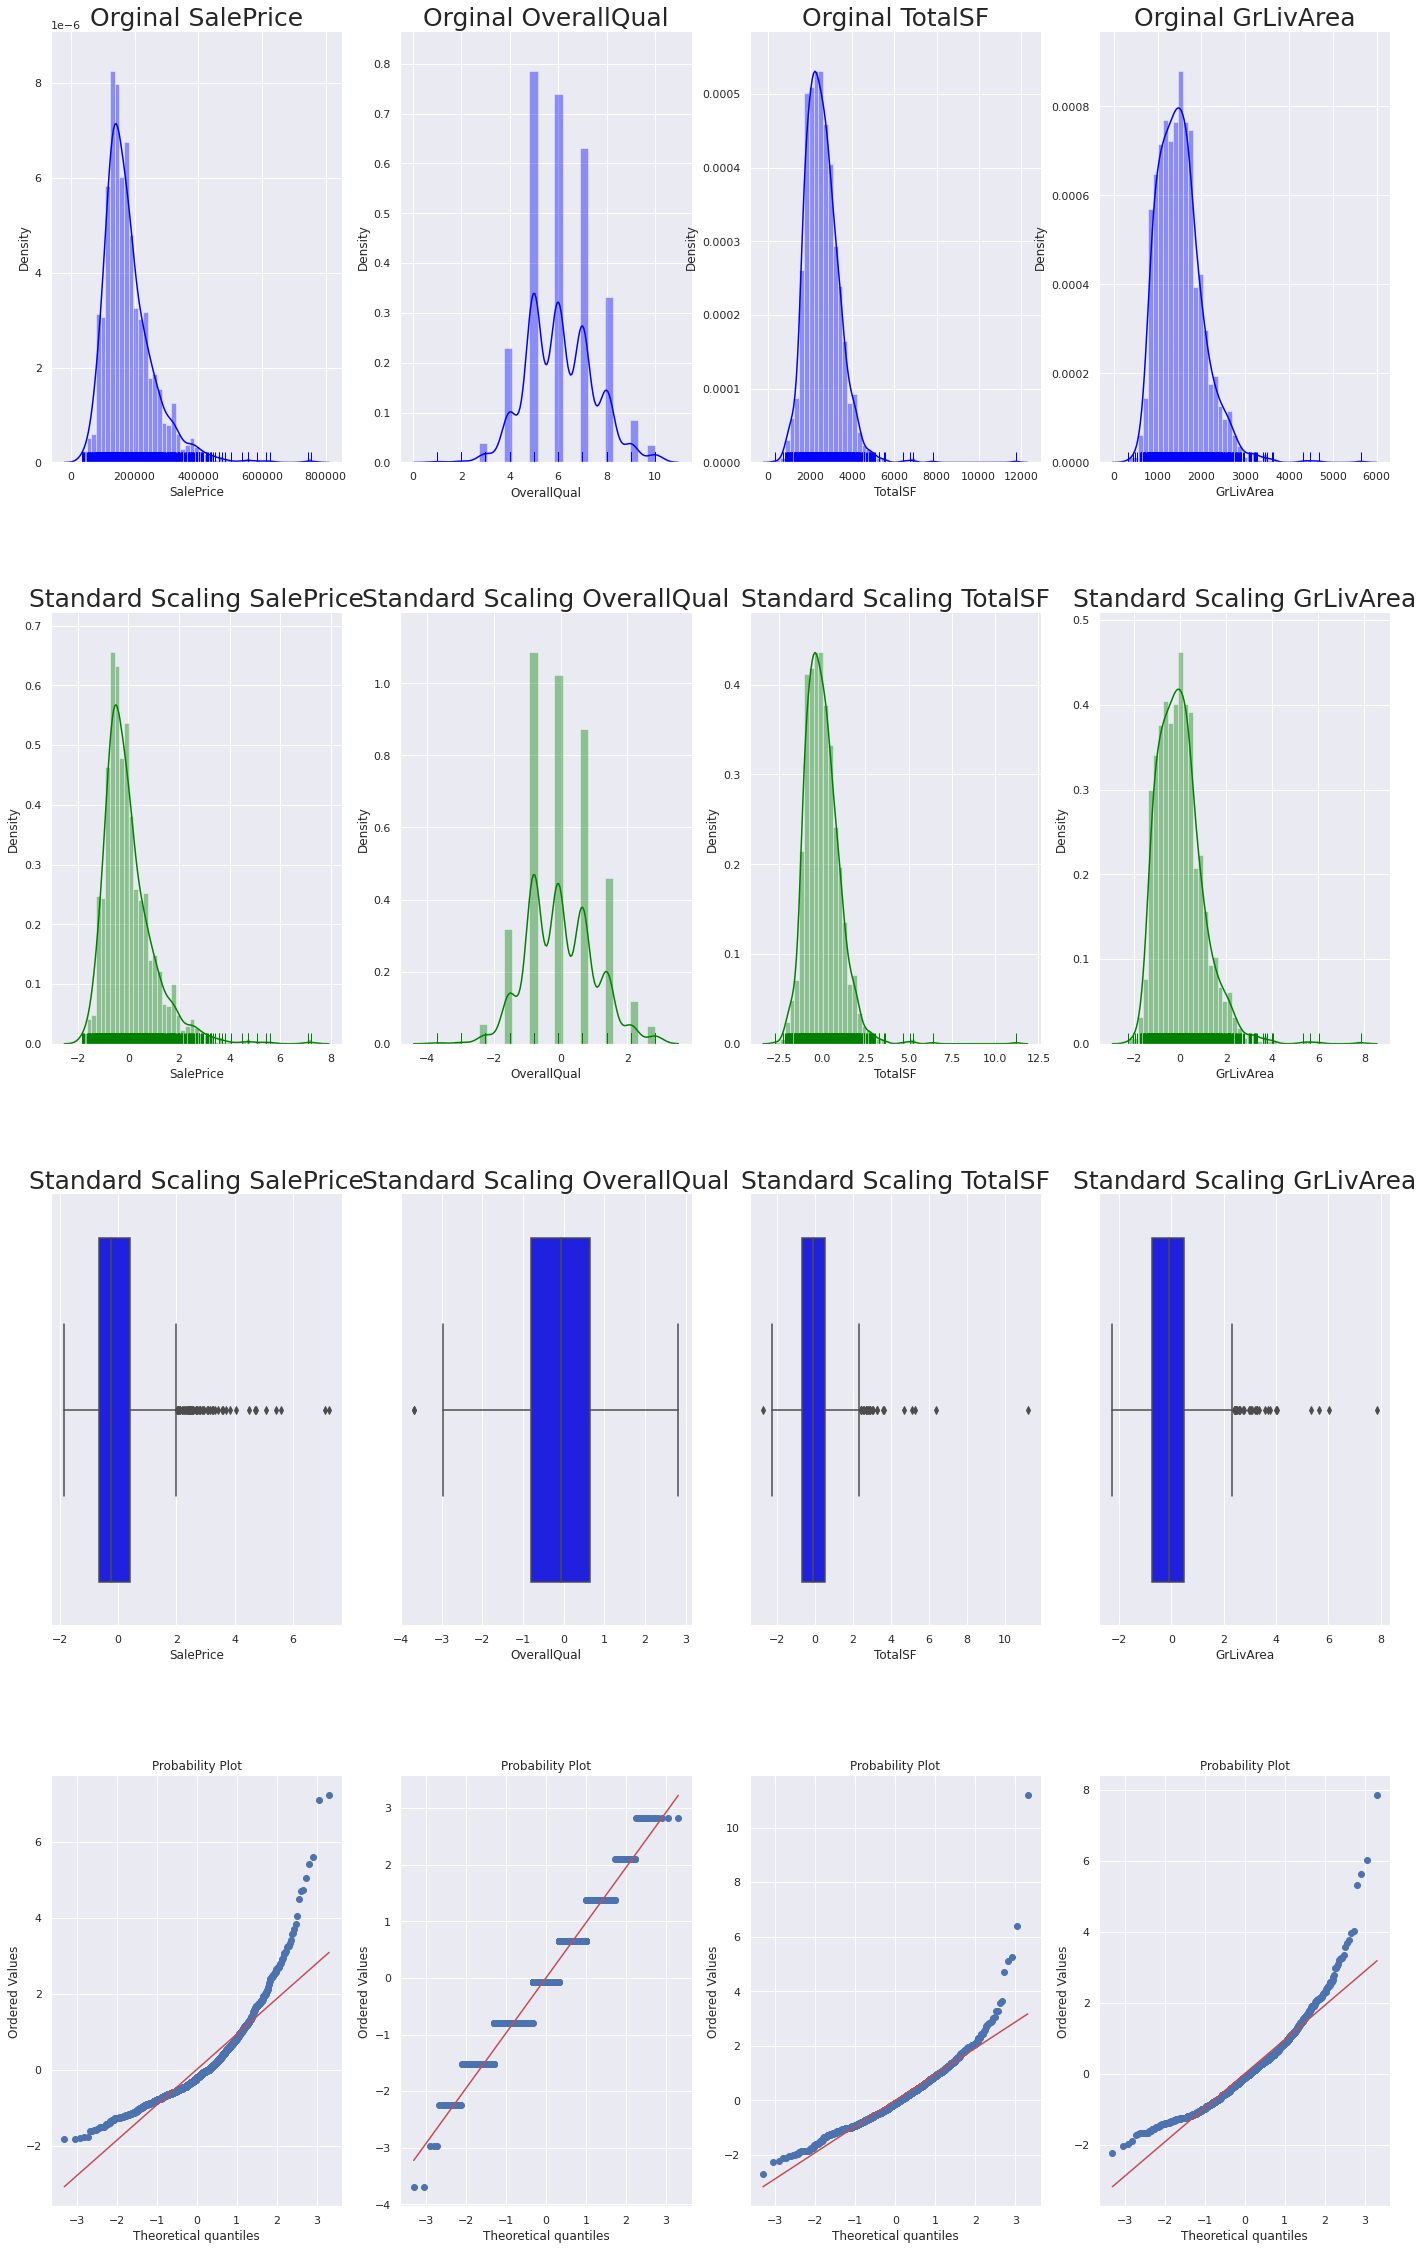

In [ ]:
# code reference: https://www.kaggle.com/ohseokkim/linear-nonlinear-scaling

from sklearn.preprocessing import StandardScaler
train_x = train_df.copy()
rcParams['figure.figsize'] = 24,40
fig, axes = plt.subplots(4, 4)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)
num_cols = ['SalePrice','OverallQual', 'TotalSF', 'GrLivArea']
for i in range(4):
    scaler = StandardScaler()
    train_x.loc[:,num_cols[i]] = scaler.fit_transform(train_x.loc[:,[num_cols[i]]])
    sns.distplot(train_df.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='blue')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_x.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='green')
    axes[1,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_x.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_x[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
# stats after standard scaling
display_stat(num_cols, train_x)

SalePrice:
mean: 0.0000, std: 1.0003, skew: 1.8829, kurtosis: 6.5363 
OverallQual:
mean: -0.0000, std: 1.0003, skew: 0.2169, kurtosis: 0.0963 
TotalSF:
mean: -0.0000, std: 1.0003, skew: 1.7767, kurtosis: 12.6220 
GrLivArea:
mean: -0.0000, std: 1.0003, skew: 1.3666, kurtosis: 4.8951 


** Standard Scaler** observations:
*   The distribution changed to the standard normal distribution.
*   Skewness and kurtosis remains same as original distribution.




##**MinMaxScaler**

Rescale the data so that all feature values are between 0 and 1. However, if there is an outlier, the transformed value may be compressed into a very narrow range.

In other words, MinMaxScaler is also very sensitive to the existence of outliers.

Text(0.5, 1.0, 'Orginal SalePrice')

Text(0.5, 1.0, 'Standard Scaling SalePrice')

Text(0.5, 1.0, 'Standard Scaling SalePrice')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([0.00000000e+00, 5.70754062e-04, 4.16608804e-03, ...,
         8.19469518e-01, 9.86113040e-01, 1.00000000e+00])),
 (0.10298592521204578, 0.20277905275713234, 0.931966564151299))

Text(0.5, 1.0, 'Orginal OverallQual')

Text(0.5, 1.0, 'Standard Scaling OverallQual')

Text(0.5, 1.0, 'Standard Scaling OverallQual')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([0.        , 0.        , 0.11111111, ..., 1.        , 1.        ,
         1.        ])),
 (0.14986697053520287, 0.5665905631659056, 0.9736657788215174))

Text(0.5, 1.0, 'Orginal TotalSF')

Text(0.5, 1.0, 'Standard Scaling TotalSF')

Text(0.5, 1.0, 'Standard Scaling TotalSF')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([0.        , 0.03380627, 0.03450692, ..., 0.57260466, 0.65510597,
         1.        ])),
 (0.06893202386706156, 0.19557265984734512, 0.9562528087332869))

Text(0.5, 1.0, 'Orginal GrLivArea')

Text(0.5, 1.0, 'Standard Scaling GrLivArea')

Text(0.5, 1.0, 'Standard Scaling GrLivArea')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([0.        , 0.01959307, 0.02750565, ..., 0.78033157, 0.81801055,
         1.        ])),
 (0.09545620776656094, 0.2225817065994983, 0.9626338898809196))

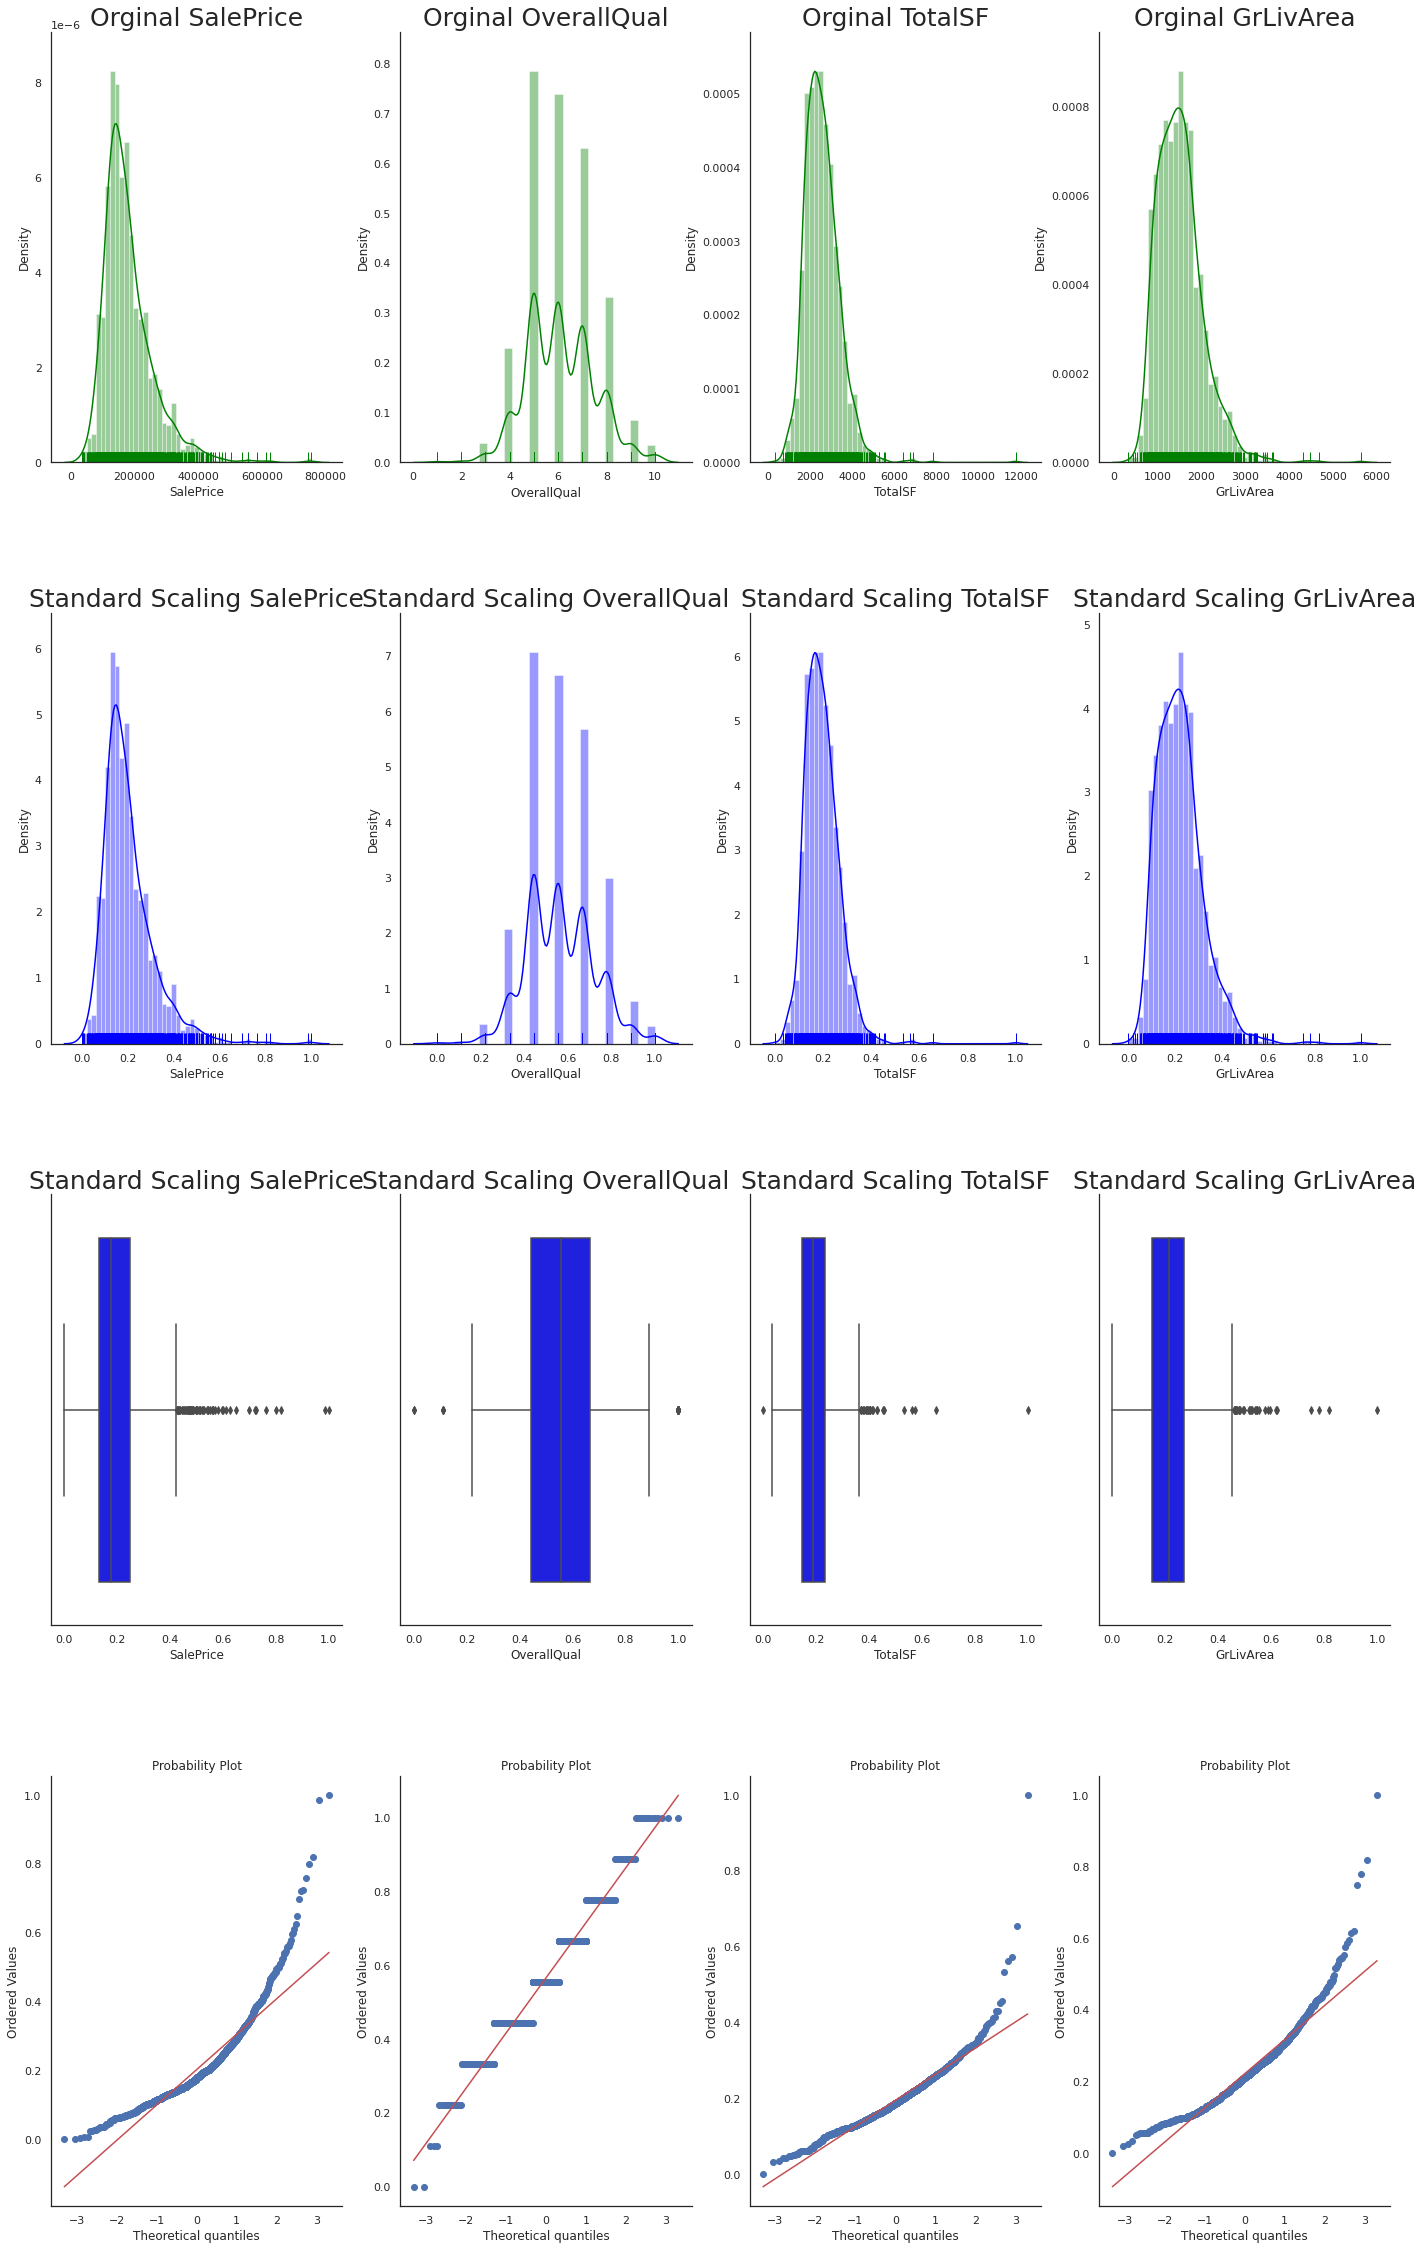

In [ ]:
from sklearn.preprocessing import MinMaxScaler
train_y = train_df.copy()
rcParams['figure.figsize'] = 24,40
fig, axes = plt.subplots(4, 4)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)

scaler = MinMaxScaler()
for i in range(4):
    train_y.loc[:,num_cols[i]] = scaler.fit_transform(train_y[[num_cols[i]]])
    sns.distplot(train_df.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
    axes[0,i].set_title('Orginal '+num_cols[i],fontsize=25)
    sns.distplot(train_y.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
    axes[1,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    sns.boxplot(train_y.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
    axes[2,i].set_title('Standard Scaling '+num_cols[i],fontsize=25)
    stats.probplot(train_y[num_cols[i]],plot = axes[3,i])
    sns.despine()

In [ ]:
train_y.head()

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,TotalSF,Total_Bathrooms,Total_porch_sf,YearsSinceRemodel
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,0.259231,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,0.241078,0,1,1,1,0,0.195481,3.5,61,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.555556,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,0.174830,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,0.203583,0,0,1,1,1,0.191802,2.5,0,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,0.273549,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,0.261908,0,1,1,1,1,0.207742,3.5,42,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.666667,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,0.260550,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,0.145952,0,1,1,1,1,0.187336,2.0,307,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,0.777778,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,0.351168,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,0.298709,0,1,1,1,1,0.263531,3.5,84,8


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,TotalSF,Total_Bathrooms,Total_porch_sf,YearsSinceRemodel
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,1,1,1,0,2566,3.5,61,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,0,1,1,1,2524,2.5,0,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,1,1,1,1,2706,3.5,42,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,1,1,1,1,2473,2.0,307,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,1,1,1,1,3343,3.5,84,8


In [ ]:
# stats after standard scaling
display_stat(num_cols, train_y)

SalePrice:
mean: 0.2028, std: 0.1103, skew: 1.8829, kurtosis: 6.5363 
OverallQual:
mean: 0.5666, std: 0.1537, skew: 0.2169, kurtosis: 0.0963 
TotalSF:
mean: 0.1956, std: 0.0720, skew: 1.7767, kurtosis: 12.6220 
GrLivArea:
mean: 0.2226, std: 0.0990, skew: 1.3666, kurtosis: 4.8951 


MinMaxScaler observations:
*   The distribution is mapped between 0 and 1 while maintaining the shape of the original distribution.
*   Skewness and kurtosis remains same as original distribution.



In [ ]:
corr = train_df[num_fields].corr()
corrl = corr.nlargest(len(num_fields), 'SalePrice')['SalePrice']
#print(strng_corr.iloc[1])
corrl

SalePrice          1.000000
OverallQual        0.790982
TotalSF            0.782260
GrLivArea          0.708624
GarageCars         0.640409
Total_Bathrooms    0.631731
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
MasVnrArea         0.472614
HasFireplace       0.471908
Fireplaces         0.466929
GarageYrBlt        0.397778
BsmtFinSF1         0.386420
LotFrontage        0.329220
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
HalfBath           0.284108
LotArea            0.263843
HasGarage          0.236832
BsmtFullBath       0.227122
BsmtUnfSF          0.214479
BedroomAbvGr       0.168213
HasBsmt            0.152829
Has2ndFloor        0.137656
ScreenPorch        0.111447
HasPool            0.093708
PoolArea           0.092404
MoSold             0.046432
3SsnPorch          0.044584
BsmtFinSF2        -0.011378
BsmtHalfBath      -0.016844
MiscVal           -0

This means the following variables has strong correlation with the SalePrice, hence will be helpful with prediction

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']



In [ ]:
num_strng_corr = corr_gt70
num_strng_corr.append("SalePrice")
num_strng_corr[0]


'OverallQual'

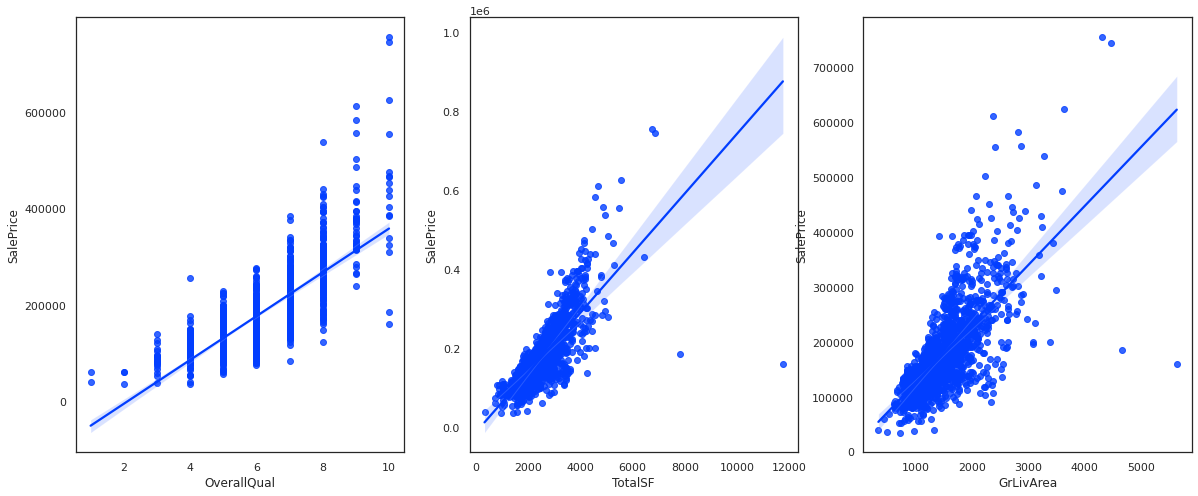

In [ ]:


fig, ax = plt.subplots(1, 3, figsize = (20, 8))


for i, ax in enumerate(fig.axes):
  if i < len(num_strng_corr) - 1:
    sns.regplot(x = num_strng_corr[i],y='SalePrice', data=train_df, ax=ax)
    #sns.violinplot(x = num_strng_corr[i],y='SalePrice', data=train_df, ax = ax)

plt.show()



In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(train_df, x="TotalSF", y="SalePrice", color="GrLivArea", 
                 marginal_x="box", marginal_y="violin",
                  title="SalesPrice distribution against Total Sq. ft. and Ground Living Area Sq. ft. ")
fig.show()

In [ ]:


import plotly.express as px
df = px.data.iris()
fig = px.scatter(train_df, x="TotalSF", y="SalePrice", color="TotalSF", 
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.show()

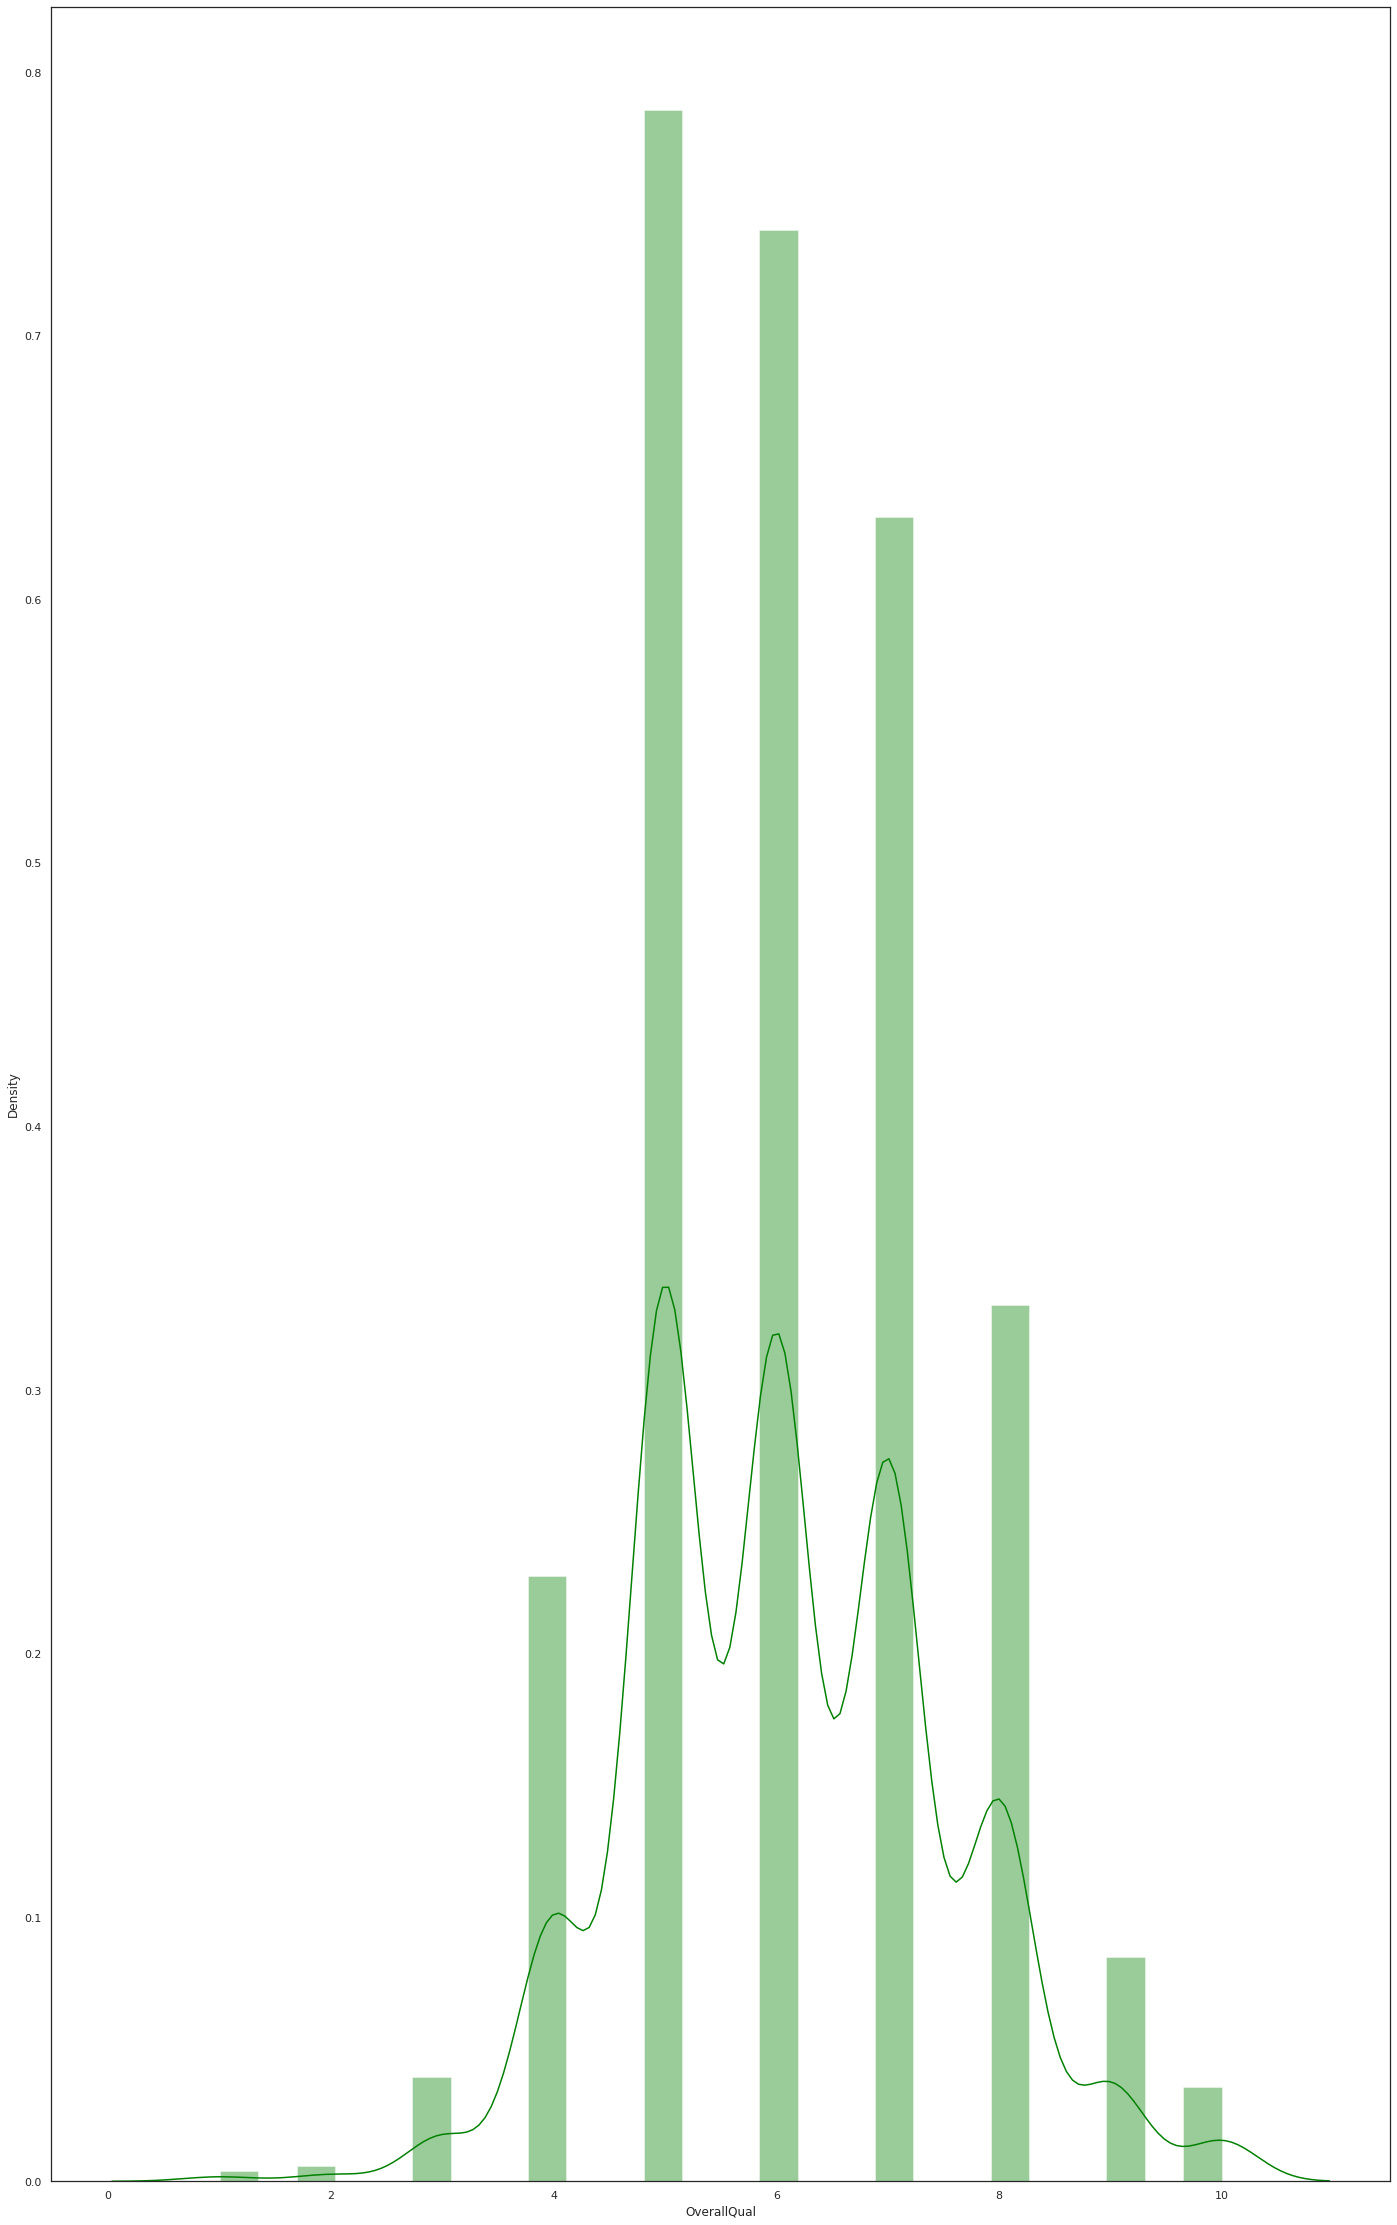

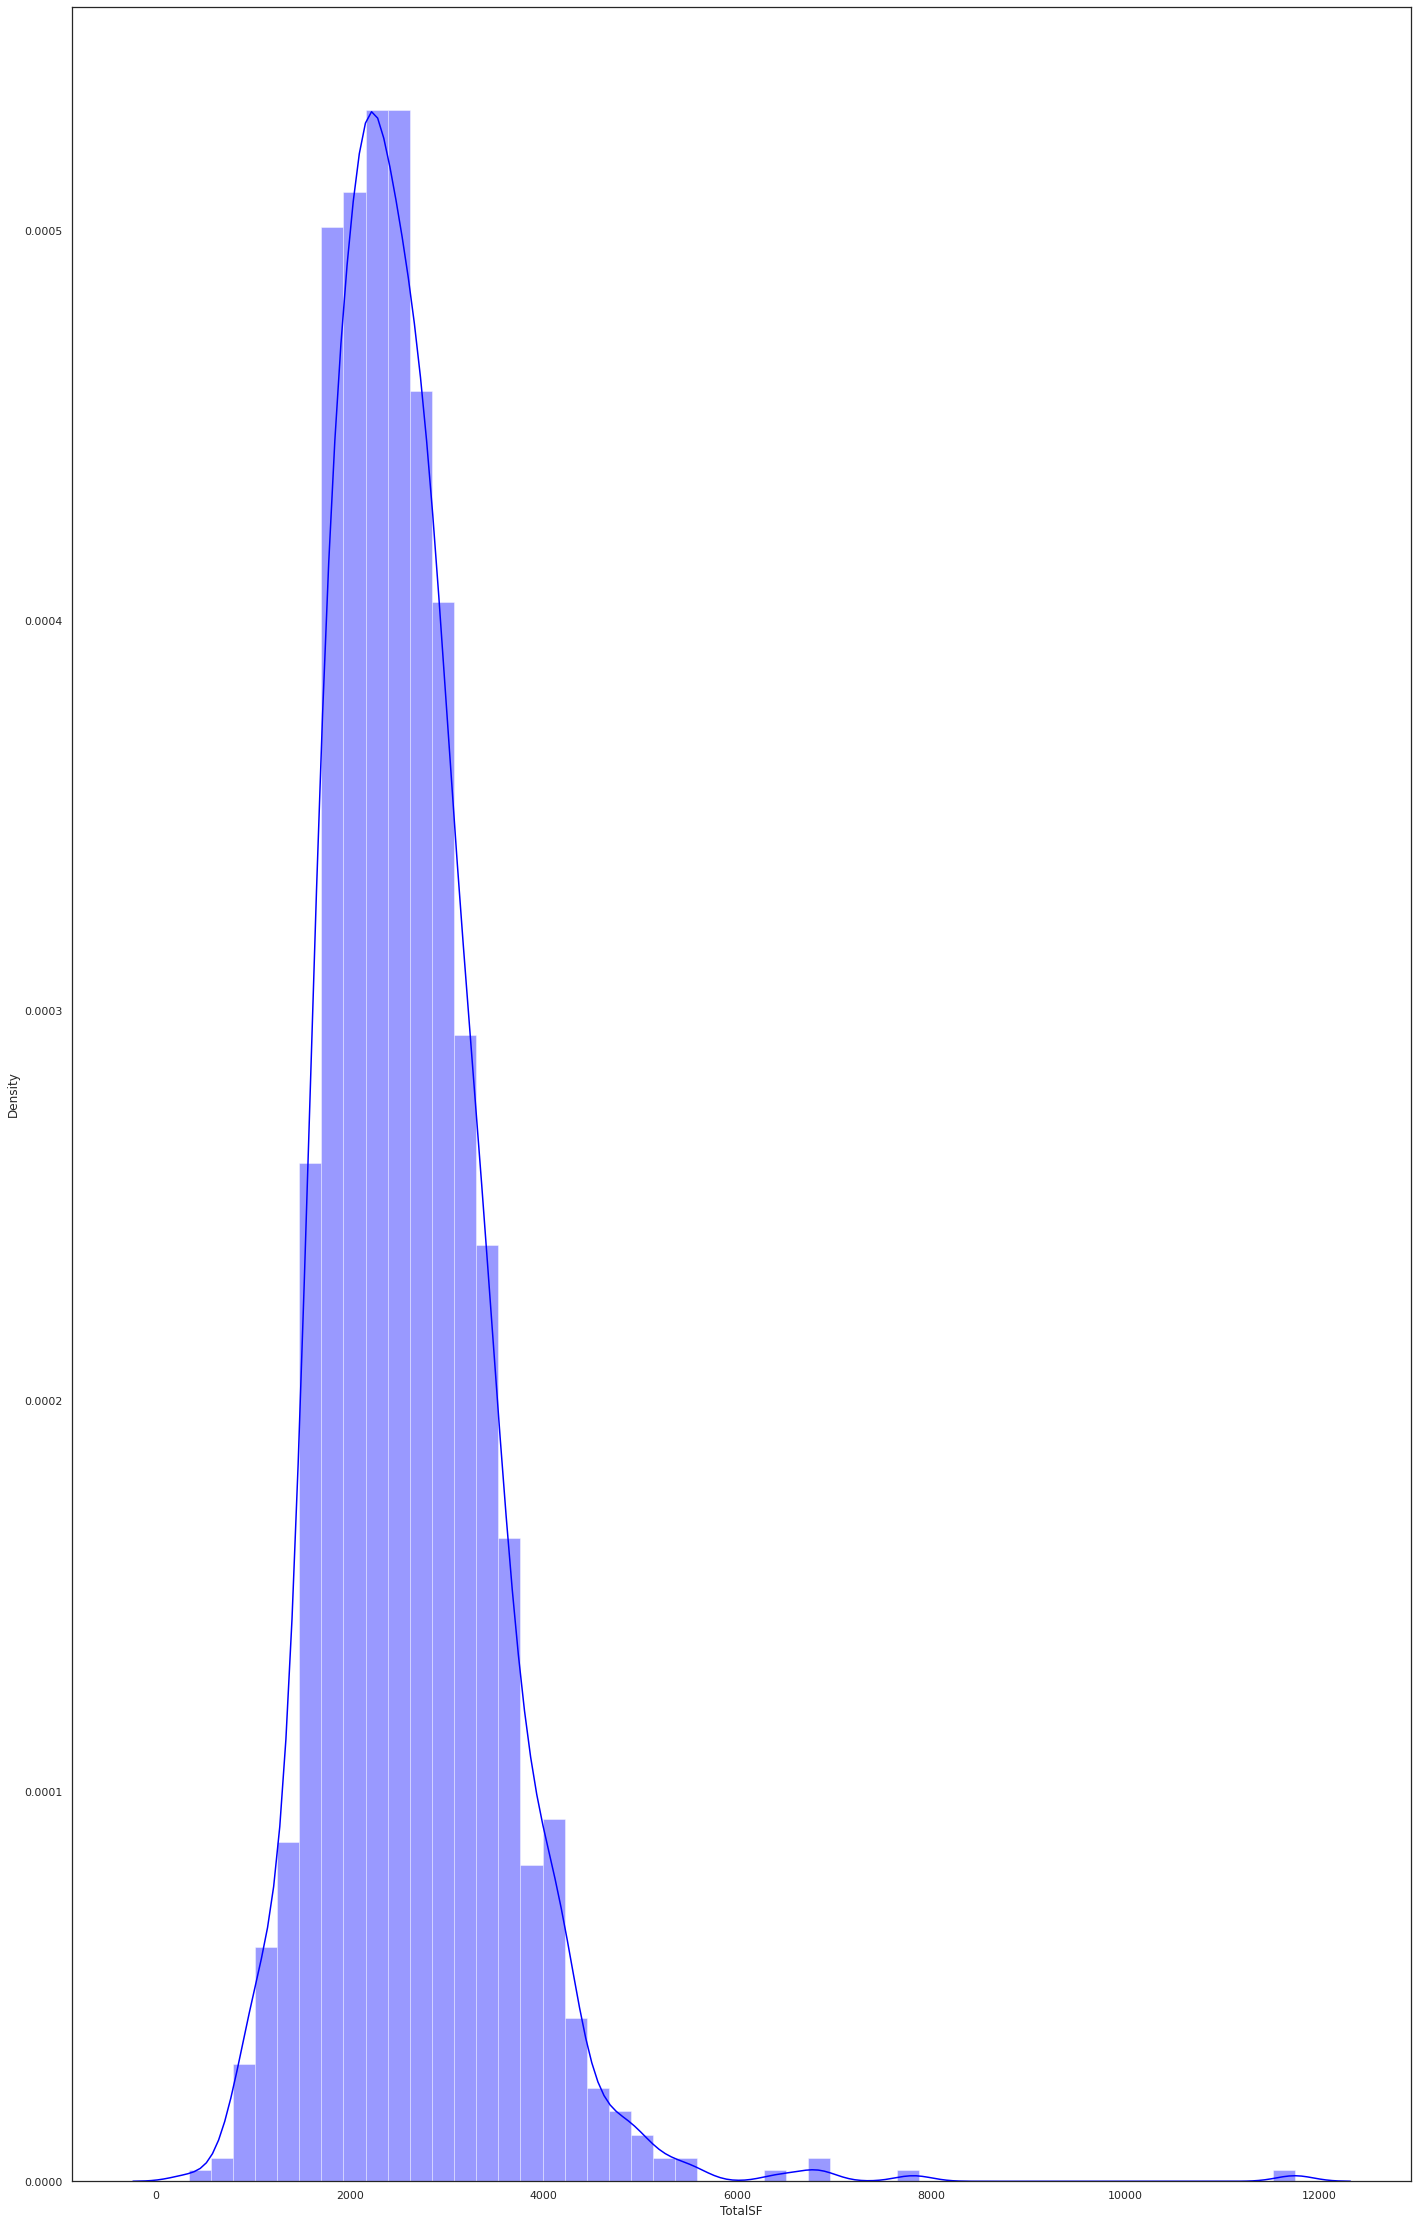

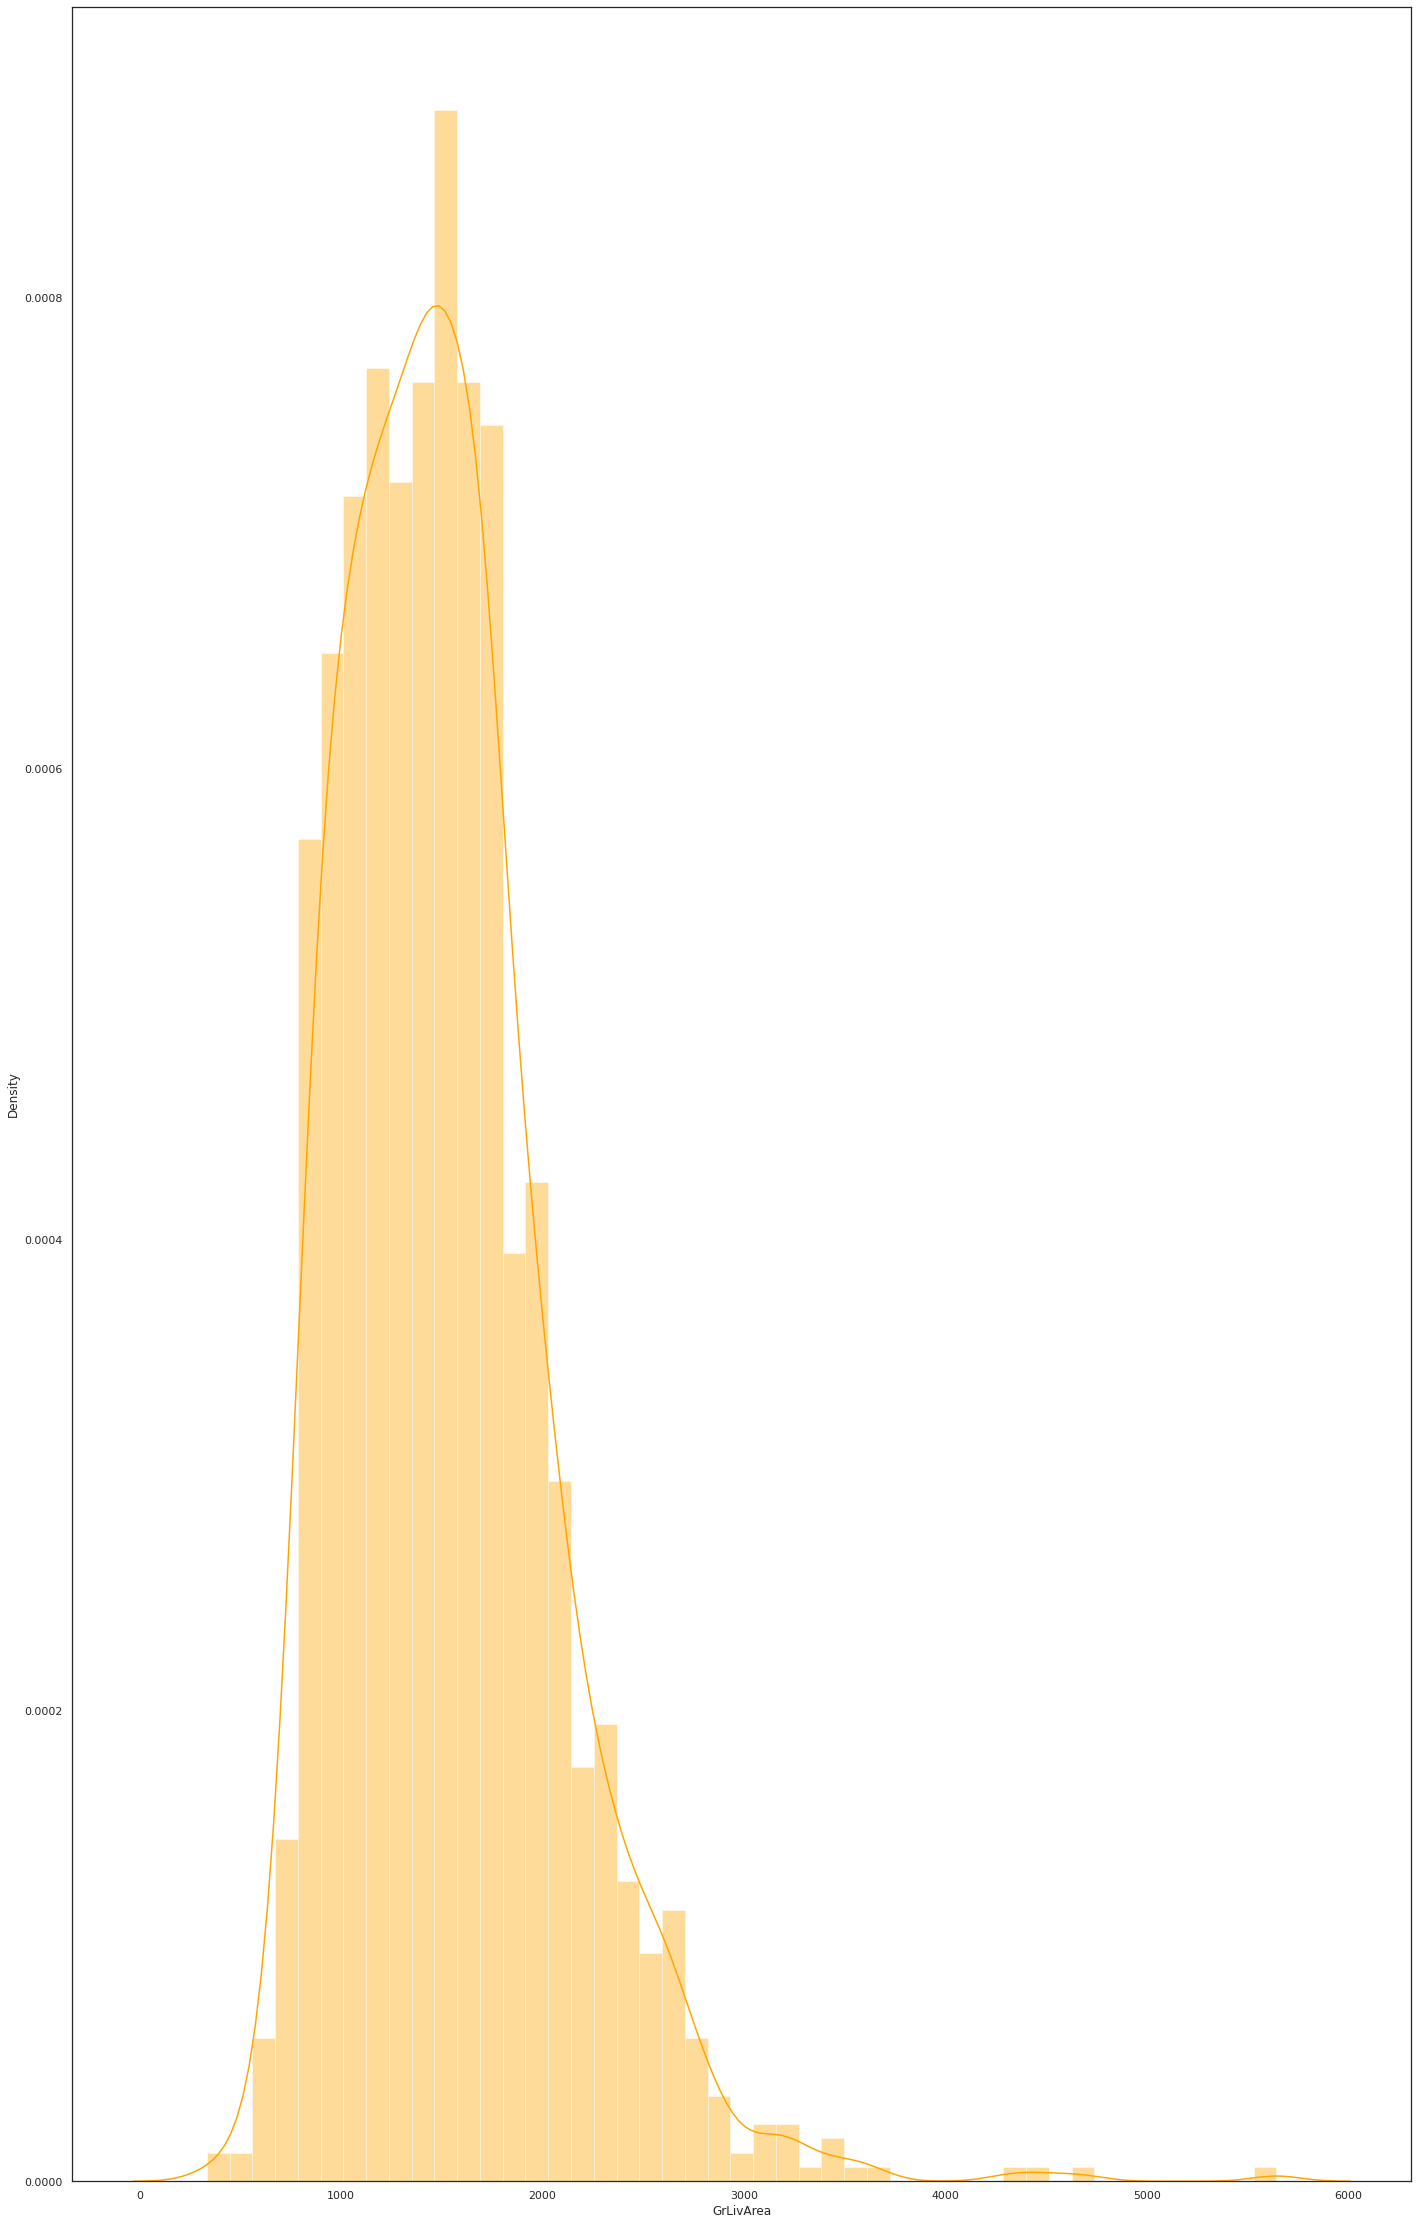

In [ ]:

sns.distplot(train_df[num_strng_corr[0]], color='green')
plt.show()
sns.distplot(train_df[num_strng_corr[1]], color='blue')
plt.show()
sns.distplot(train_df[num_strng_corr[2]], color='orange')
plt.show()

##Analyze categorical data

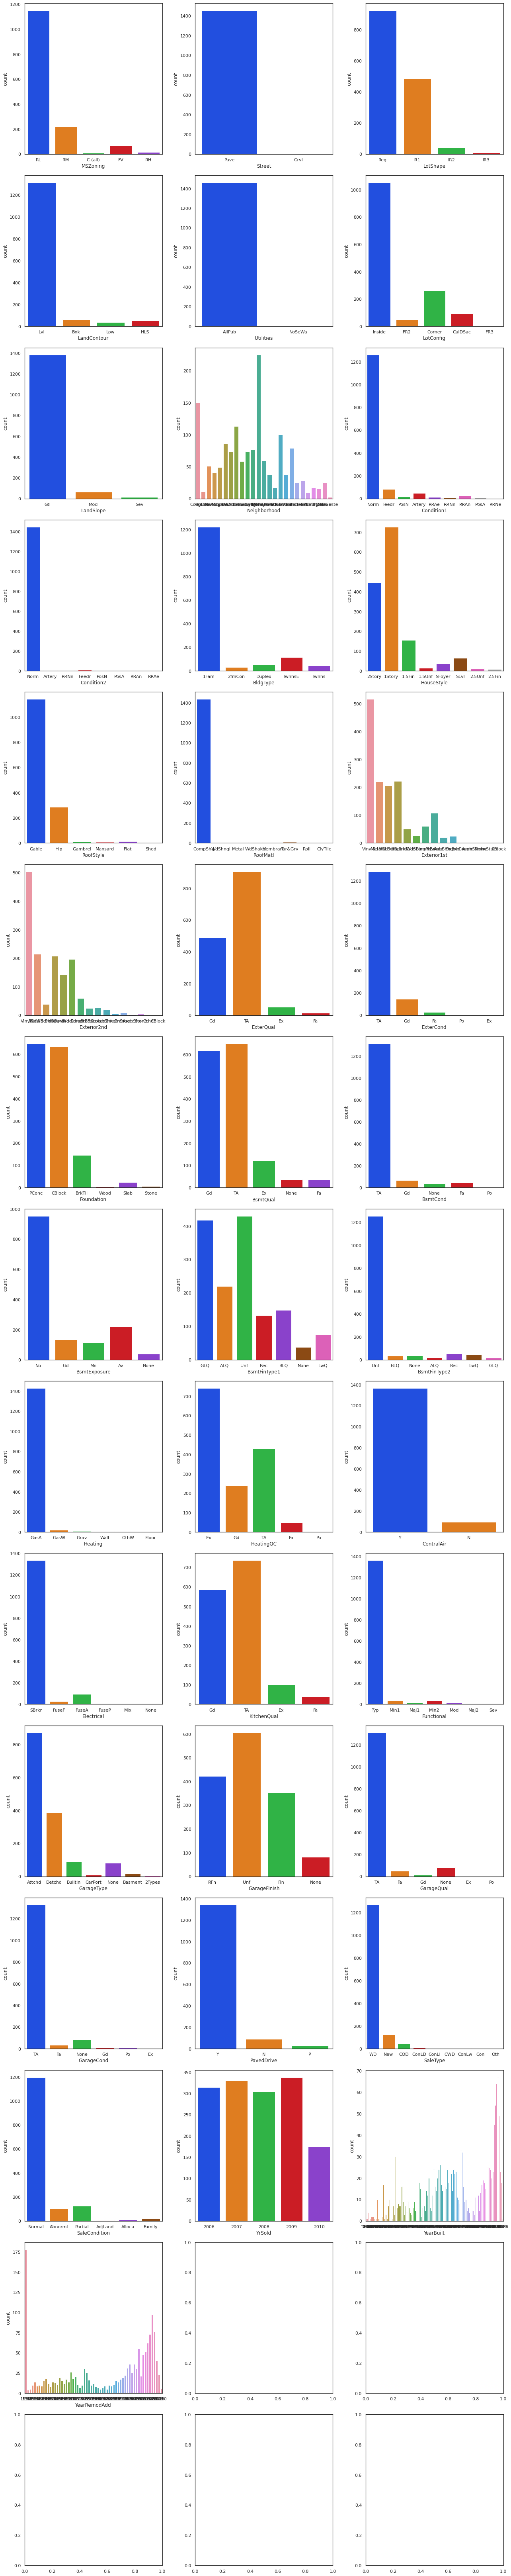

In [ ]:
# Analyze each category using barplot
#https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

rows = 15
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*6,rows*6))

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(cat_fields):
            sns.countplot(x=cat_fields[i], data=train_df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   



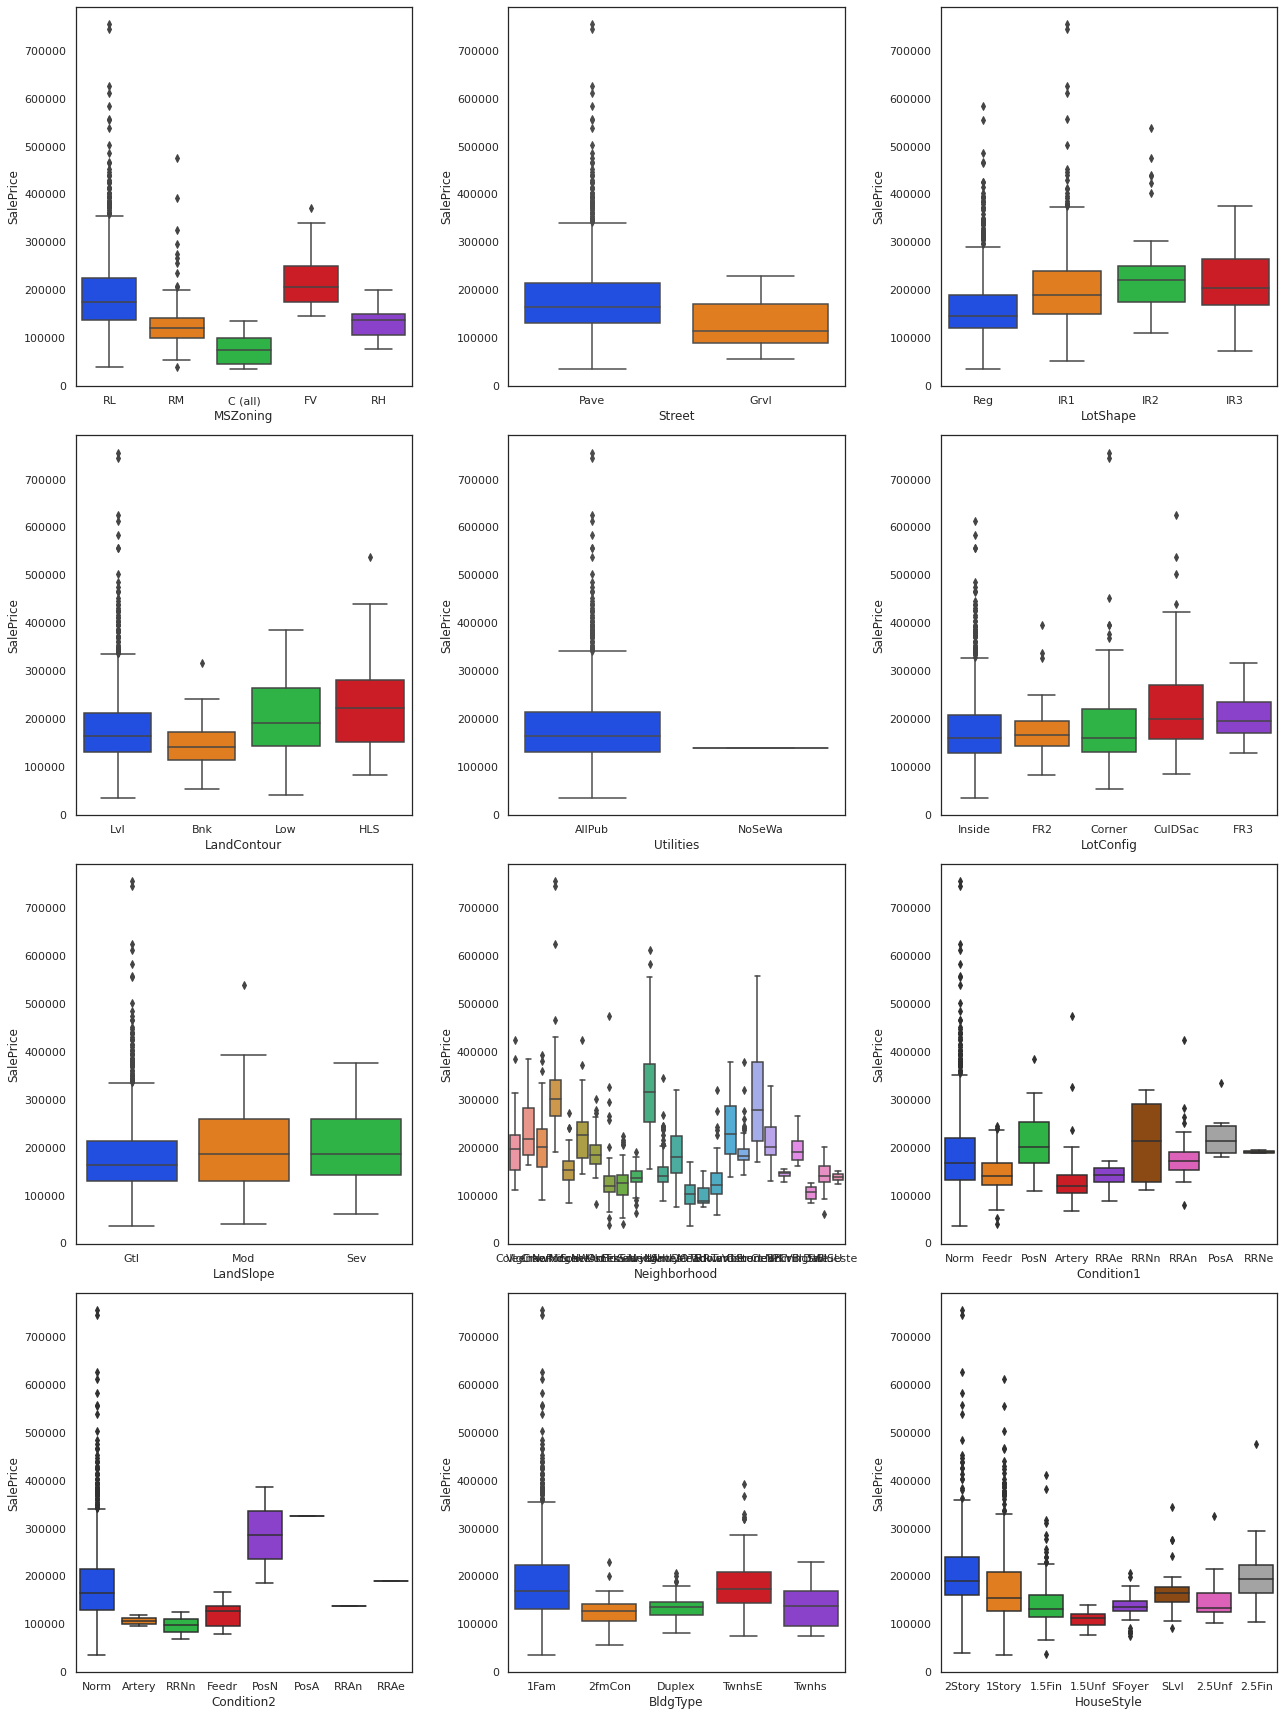

In [ ]:
#Box plot to find fields with outliers

rows = 4
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*6,rows*6))

#numeric_field = []
#numeric_field = num_fields.remove('Id')

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(cat_fields):
            sns.boxplot(x=cat_fields[i], y='SalePrice', data=train_df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()  

I am not able to find correlation for categorical in a same way I did for numeric variable. I used the function shared in the article below:

<i>Going categorical
What we need is something that will look like correlation, but will work with categorical values — or more formally, we’re looking for a measure of association between two categorical features. Introducing: Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:
Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y</i>

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9


In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
# Correlation between variables

#for i in range(0,len(cat_fields)):
 # for j in range(i+1,len(cat_fields)):
   # cat_corr = cramers_v(train_df[cat_fields[i]], train_df[cat_fields[i]])
   # if(cat_corr > .99):
     # print("Correlation between {} and {} is: {}".format(cat_fields[i], cat_fields[j], cat_corr ))


In [ ]:
# Correlation of variables with saleprice

cat_stng_corr = []
cat_weak_corr = []
data1 = []


for i in range(0,len(cat_fields)):
  cat_corr = cramers_v(train_df[cat_fields[i]], train_df['SalePrice'])
  data1.append([cat_fields[i], cat_corr])
  if(cat_corr>0.30):
    cat_stng_corr.append(cat_fields[i])
    print("Correlation between {} and {} is: {}".format(cat_fields[i], 'SalePrice', cat_corr ))
  else:
    cat_weak_corr.append(cat_fields[i])

  
cat_corr_df = pd.DataFrame(data1, columns=['Field_Name','Corr_with_SalePrice'])

cat_stng_corr.append('SalePrice')
print(cat_stng_corr)
print('\n')
print(cat_weak_corr)
print('\n')
cat_corr_df.sort_values(by = ['Corr_with_SalePrice'], ascending = False)

Correlation between Street and SalePrice is: 0.3934516814280061
Correlation between LotShape and SalePrice is: 0.3240087213186113
Correlation between ExterQual and SalePrice is: 0.44418679896862595
Correlation between ExterCond and SalePrice is: 0.3053512909406099
Correlation between BsmtQual and SalePrice is: 0.39361711377532815
Correlation between BsmtCond and SalePrice is: 0.35565634673839774
Correlation between BsmtExposure and SalePrice is: 0.31567727476370555
Correlation between Heating and SalePrice is: 0.3495940524717798
Correlation between CentralAir and SalePrice is: 0.33568164198038897
Correlation between KitchenQual and SalePrice is: 0.43429939078961693
Correlation between GarageFinish and SalePrice is: 0.30918315639131877
['Street', 'LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir', 'KitchenQual', 'GarageFinish', 'SalePrice']


['MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1'

,Field_Name,Corr_with_SalePrice
16,ExterQual,0.444187
28,KitchenQual,0.434299
19,BsmtQual,0.393617
1,Street,0.393452
20,BsmtCond,0.355656
24,Heating,0.349594
26,CentralAir,0.335682
2,LotShape,0.324009
21,BsmtExposure,0.315677
31,GarageFinish,0.309183


The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the housing price tends to go up when the Kitchen, Exterior and Basement quality is good. When the coefficient is close to –1, it means that there is a strong negative correlation;Finally, coefficients close to 0 mean that there is no linear correlation.

In [ ]:
cat_stng_corr
cat_predictors = cat_corr_df[cat_corr_df.Corr_with_SalePrice >= .30]

# top three categorical predictors
cat_predictors.sort_values(by='Corr_with_SalePrice', ascending=False).head(5)

['Street',
 'LotShape',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'SalePrice']

,Field_Name,Corr_with_SalePrice
16,ExterQual,0.444187
28,KitchenQual,0.434299
19,BsmtQual,0.393617
1,Street,0.393452
20,BsmtCond,0.355656


In [ ]:
#cat_stng_corr.append('SalePrice')
train_df_cat = train_df[cat_stng_corr]
train_df_cat.head()


,Street,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,Heating,CentralAir,KitchenQual,GarageFinish,SalePrice
0,Pave,Reg,Gd,TA,Gd,TA,No,GasA,Y,Gd,RFn,208500
1,Pave,Reg,TA,TA,Gd,TA,Gd,GasA,Y,TA,RFn,181500
2,Pave,IR1,Gd,TA,Gd,TA,Mn,GasA,Y,Gd,RFn,223500
3,Pave,IR1,TA,TA,TA,Gd,No,GasA,Y,Gd,Unf,140000
4,Pave,IR1,Gd,TA,Gd,TA,Av,GasA,Y,Gd,RFn,250000


In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(train_df, x="YearBuilt", y="SalePrice", color="GarageFinish", 
                 marginal_x="box", marginal_y="violin",
                  title="SalesPrice distribution against Year built and Garage Finished ")
fig.show()

*italicized text*# We will plot countplot for categorical value with strong correlation

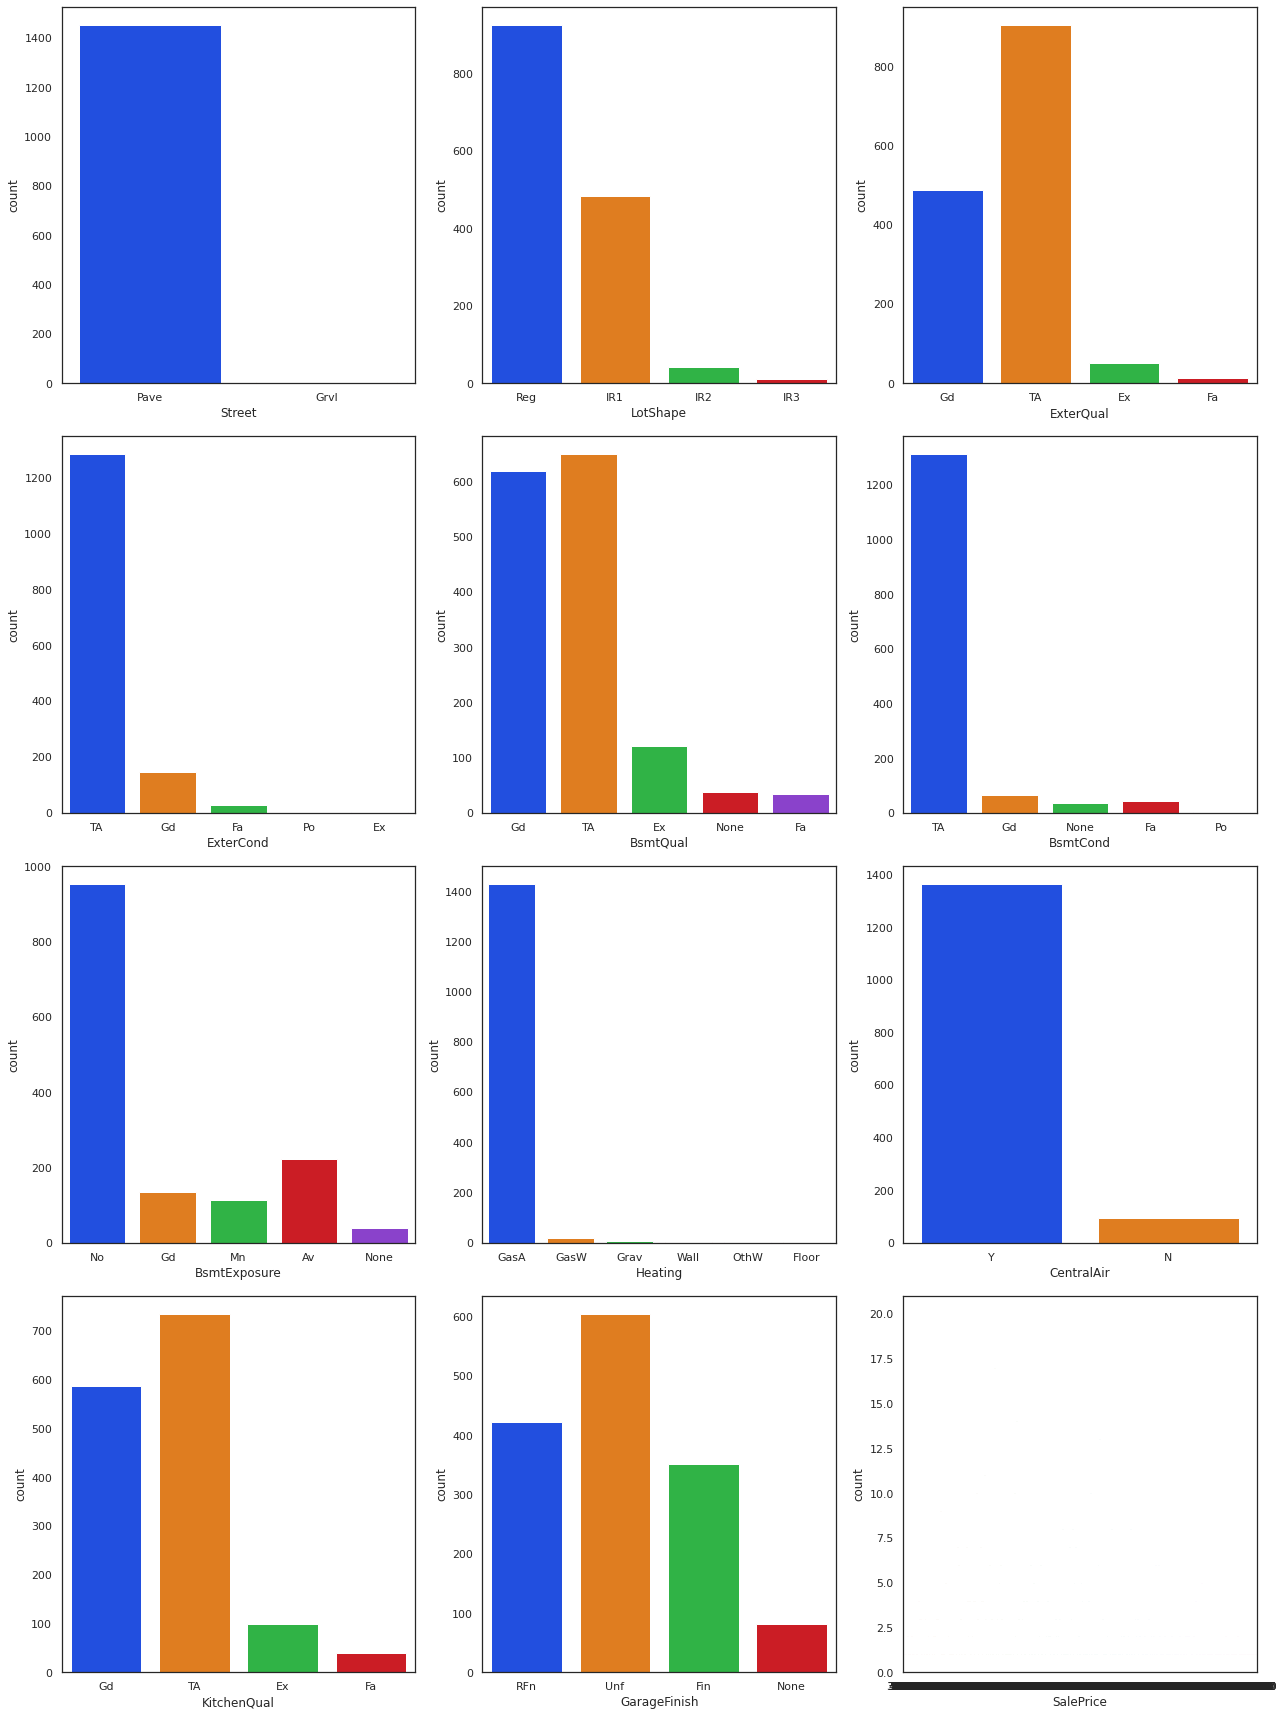

In [ ]:
# Analyze each category using barplot
#https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

rows = 4
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols*6,rows*6))

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(cat_stng_corr):
            sns.countplot(x=cat_stng_corr[i], data=train_df_cat, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   



As we can see in the bar plot, for few of the features there is one category for most of the records. For example - 'Pave' street. I would rather prefer the predictors with mix categories. For example - Garage Finish, Kitchen Quality, Basement exposure, Lot shape.

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None, None, None, None, None, None, None]

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

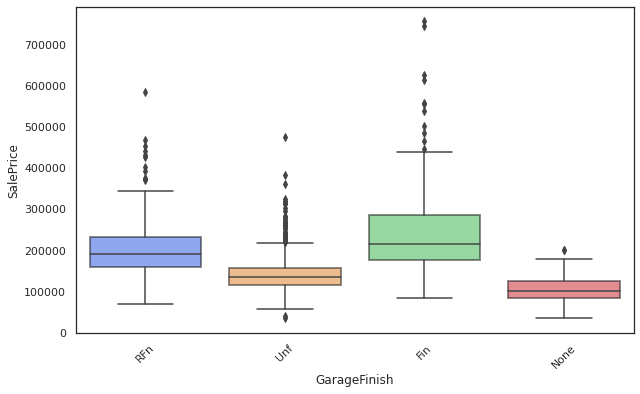

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='GarageFinish', y='SalePrice', data=train_df_cat)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None, None, None, None, None, None, None]

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

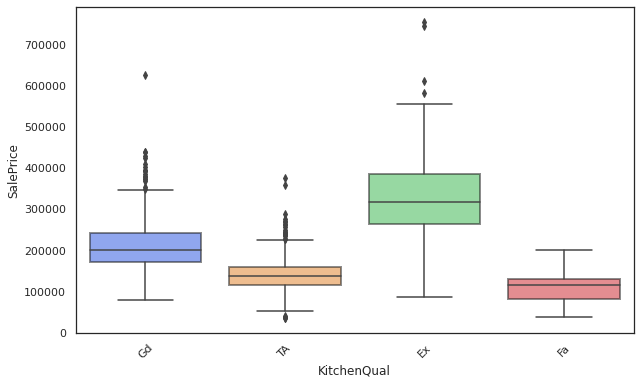

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='KitchenQual', y='SalePrice', data=train_df_cat)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None, None, None, None, None, None, None]

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

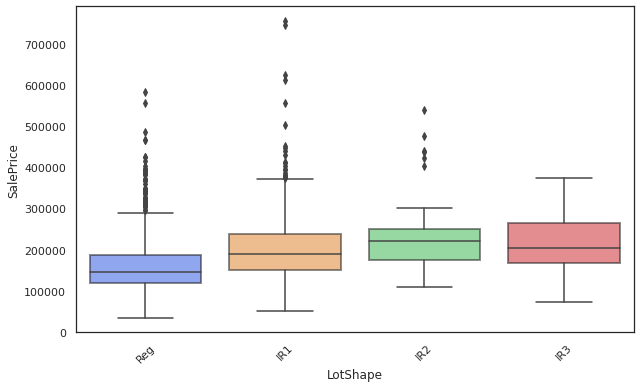

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='LotShape', y='SalePrice', data=train_df_cat)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

# Regression Modeling
**Assumption 1:**

ML algorithms work better with numerical inputs, so we need to convert categorical data into numerical data. There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set. Hereby, I would focus on 2 main methods: One-Hot-Encoding and Label-Encoder. Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.



In [ ]:


non_object = train_df.dtypes[train_df.dtypes != "object"].index
print("Number of Numerical features: ", len(non_object))

objects = train_df.dtypes[train_df.dtypes == "object"].index
print("Number of Categorical features: ", len(objects))

num_fields = []
cat_fields = []


for i in range(len(non_object)):
  num_fields.append(non_object[i])

for i in range(len(objects)):
  cat_fields.append(objects[i])

num_fields.remove("YrSold")
num_fields.remove("YearBuilt")
num_fields.remove("YearRemodAdd")
cat_fields.append("YrSold")
cat_fields.append("YearBuilt")
cat_fields.append("YearRemodAdd")


print('\n')
print("Number of Numerical features: ",len(num_fields))
print('\n')
print("Number of Categorical features: ",len(cat_fields))

Number of Numerical features:  47
Number of Categorical features:  37


Number of Numerical features:  44


Number of Categorical features:  40


In [ ]:
good_corr_num_cols = list(train_df.corr()["SalePrice"][(train_df.corr()["SalePrice"]>0.30) | (train_df.corr()["SalePrice"]<-0.30)].index)
#good_corr_num_cols
print('\n')
#cat_fields

final_col_list = good_corr_num_cols + cat_fields
final_col_list

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'HasFireplace',
 'TotalSF',
 'Total_Bathrooms',
 'YearsSinceRemodel',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'YrSold',
 'YearBuilt',
 'YearRemodAdd']

In [ ]:
train_df_model = train_df[final_col_list]

In [ ]:
# dummies values approach
train_df_v1 = pd.get_dummies(train_df_model)
train_df_v1.shape
train_df_v1.head()

(1460, 266)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,HasFireplace,TotalSF,Total_Bathrooms,YearsSinceRemodel,YrSold,YearBuilt,YearRemodAdd,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive

In [ ]:
final_test_list = final_col_list.copy()
final_test_list.remove('SalePrice')
test_df = test_df.drop_duplicates()
test_df.shape
test_df_model = test_df[final_test_list]

(1459, 83)

In [ ]:

test_df_v1 = pd.get_dummies(test_df_model)
test_df_v1.shape

(1459, 255)

In [ ]:
#drop columns with None
train_df_v2 = train_df_v1
#[train_df_v1.columns.drop(list(train_df_v1.filter(regex='None')))]
#train_df_v2.info()
#train_df_v2.shape


In [ ]:
#drop columns with None
#test_df_v1= test_df_v1.drop_duplicates()
test_df_v1.shape

#test_df_v1 = test_df_v1.reset_index()

test_df_v2 = test_df_v1
#[test_df_v1.columns.drop(list(test_df_v1.filter(regex='None')))]



(1459, 255)

In [ ]:
train_df_v2['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
#train_df.info()
X = train_df_v2.drop(['SalePrice'], axis = 1)
y = train_df_v2['SalePrice']

In [ ]:
#val_data = test_df_v2.drop(['Id'], axis = 1)
val_data=test_df_v2

In [ ]:
# Compare training and validation data set columns
X.shape
y.shape
y.head()


(1460, 265)

(1460,)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
train_extra_cols = []
train_extra_cols = np.setdiff1d(val_data.columns, X.columns)
print (train_extra_cols)


extra_cols = []
extra_cols = np.setdiff1d(X.columns, val_data.columns)
print (extra_cols)

X.head()

['Exterior1st_None' 'Exterior2nd_None' 'Functional_None'
 'KitchenQual_None' 'MSZoning_None' 'SaleType_None' 'Utilities_None']
['Condition2_RRAe' 'Condition2_RRAn' 'Condition2_RRNn' 'Electrical_Mix'
 'Electrical_None' 'Exterior1st_ImStucc' 'Exterior1st_Stone'
 'Exterior2nd_Other' 'GarageQual_Ex' 'Heating_Floor' 'Heating_OthW'
 'HouseStyle_2.5Fin' 'RoofMatl_ClyTile' 'RoofMatl_Membran'
 'RoofMatl_Metal' 'RoofMatl_Roll' 'Utilities_NoSeWa']


,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,HasFireplace,TotalSF,Total_Bathrooms,YearsSinceRemodel,YrSold,YearBuilt,YearRemodAdd,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDr

In [ ]:
#Remove extra columns from taining data set

X_draft = X.drop(['Condition2_RRAe', 'Condition2_RRAn' ,'Condition2_RRNn', 'Electrical_Mix','Electrical_None',
                  'Exterior1st_ImStucc', 'Exterior1st_Stone' ,'Exterior2nd_Other',
                  'GarageQual_Ex', 'Heating_Floor' ,'Heating_OthW', 'HouseStyle_2.5Fin',
                  'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
                  'Utilities_NoSeWa'], axis = 1)


In [ ]:
val_draft = test_df_v2.drop(['Exterior1st_None', 'Exterior2nd_None', 'Functional_None',
                            'KitchenQual_None' ,'MSZoning_None' ,'SaleType_None' ,'Utilities_None'], axis = 1)

In [ ]:
train_extra_cols = []
train_extra_cols = np.setdiff1d(val_draft.columns, X_draft.columns)
print (train_extra_cols)


extra_cols = []
extra_cols = np.setdiff1d(X_draft.columns, val_draft.columns)
print (extra_cols)



[]
[]


In [ ]:
# Compare training and validation data set columns
X_draft.shape
val_draft.shape

linear_features=np.array([col for col in X_draft.columns])


(1460, 248)

(1459, 248)


### Scaling (RobustScaler) before regression




In [ ]:
scaler=RobustScaler()

X_final=pd.DataFrame(scaler.fit_transform(X_draft),columns=X_draft.columns)

#val_draft.shape
#val_draft[linear_features].shape

val_data=pd.DataFrame(scaler.fit_transform(val_draft),columns=X_draft.columns)


Even though we have train and test dataset, we will start with splitting the training dataset and then predict finally using test.csv

 - X_train: the subset of our features used for training
 - X_test: the subset which will be our ‘hold-out’ set – what we’ll use to test the model
 - y_train: the target variable SalePrice which corresponds to X_train
 - y_test: the target variable SalePrice which corresponds to X_test





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.7, random_state = 42)

## Linear Regression Model

In [ ]:
#fit the model on training dataset
model1 = LinearRegression().fit(X_train, y_train)
#model1 = LinearRegression().fit(X_final, y)

In [ ]:
#Check model parameters
model1.score(X_train, y_train)

0.9619519170217686

In [ ]:
# Check model prediction on test data (from training set)
model1_predict = model1.predict(X_test)

In [ ]:
#Evaluate the model1
print ('MAE:', mean_absolute_error(y_test, model1_predict))
print ('MSE:', mean_squared_error(y_test, model1_predict))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, model1_predict)))

MAE: 40171553039234.73
MSE: 7.18785336723565e+28
RMSE: 268101722621016.56


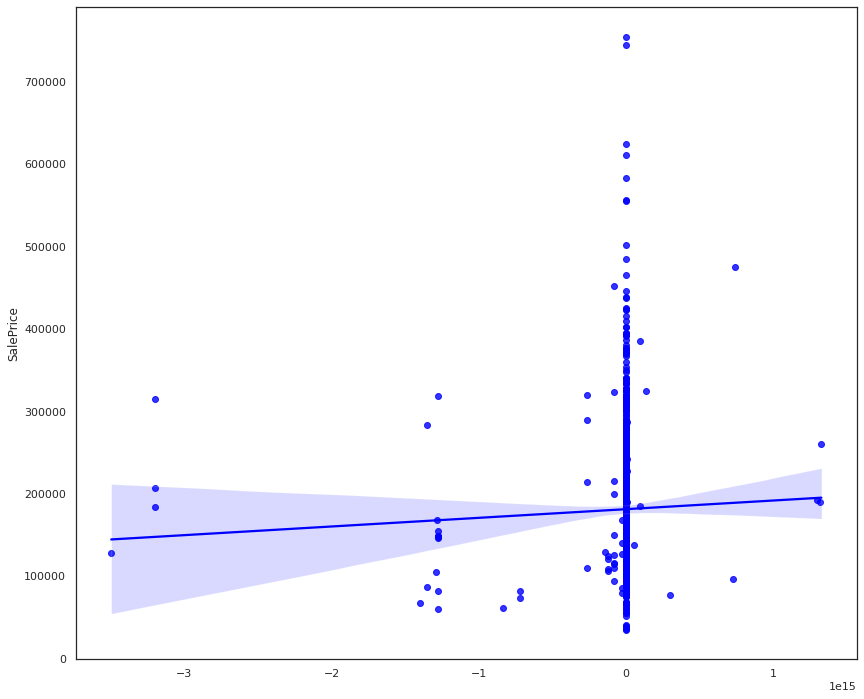

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 12))
ax = sns.regplot(x=model1_predict, y=y_test, color="blue")


Validate the model with unseen test set

In [ ]:
# model validation with test data
val_data.shape
val_predict_1 = model1.predict(val_data)
print(val_predict_1)

(1459, 248)

[-2.94695918e+14 -4.72761934e+14  2.12053315e+14 ... -4.19123510e+14
 -2.99253703e+14  3.95606505e+14]


##Polynomial Linear Regression

In [ ]:
 
#poly = PolynomialFeatures(degree = 2)
#X_poly = poly.fit_transform(X_train)
 
#poly.fit(X_poly, y_train)
#lin2 = LinearRegression()
#lin2.fit(X_poly, y_train)

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_1 = poly_reg.fit_transform(X_train)
X_test_1 = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_1, y_train)
poly_predict = lin_reg.predict(X_test_1)

LinearRegression()

In [ ]:
#val_data_1 = poly_reg.transform(val_data)
#poly_predict = lin_reg.predict(val_data_1)

In [ ]:
print ('MAE:', mean_absolute_error(y_test, poly_predict))
print ('MSE:', mean_squared_error(y_test, poly_predict))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, poly_predict)))

MAE: 19568.40868853505
MSE: 3436937457.1938906
RMSE: 58625.39942033564


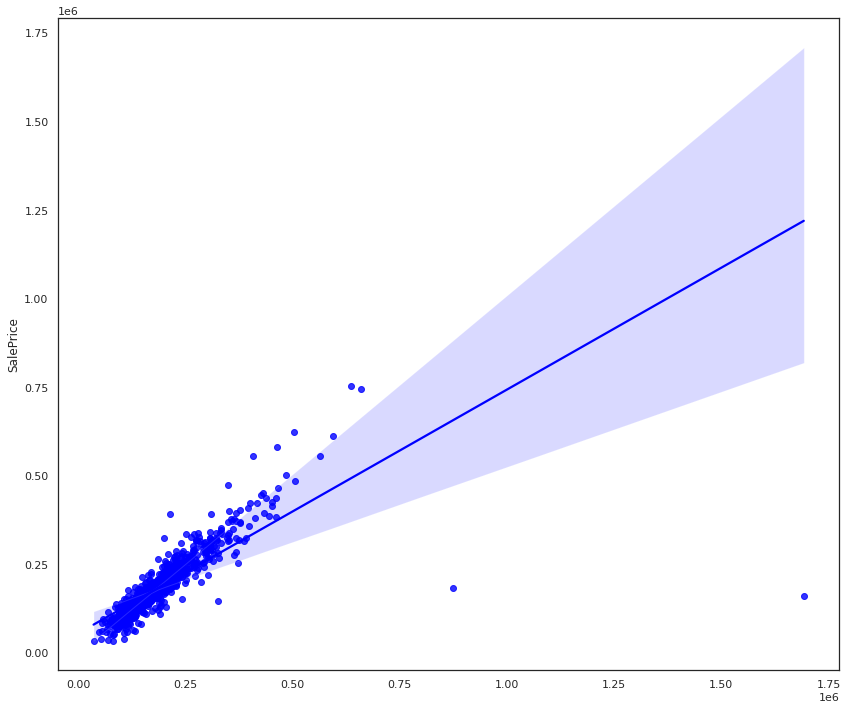

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 12))

ax = sns.regplot(x=poly_predict, y=y_test, color="blue")


In [ ]:
X_train.shape
y_train.shape

(438, 248)

(438,)

#W3 Regression Modeling

## Lasso Regression

I choose lasso due to it's capability of reducing the variability and improving the accuracy of linear regression models.  

 - The assumptions of lasso regression is same as least squared regression except normality is not to be assumed
 - Lasso Regression shrinks coefficients to zero (exactly zero), which certainly helps in feature selection
 - Lasso is a regularization method and uses l1 regularization
 - If group of predictors are highly correlated, lasso picks only one of them and shrinks the others to zero

In [ ]:
#model2 = Lasso(alpha=1.0)
lasso = Lasso()
lasso.fit(X_train, y_train)
#predictions = lasso.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.412e+09, tolerance: 2.301e+08



Lasso()

In [ ]:
lasso_predict = lasso.predict(X_test)

In [ ]:
#Evaluate the model1
print ('MAE:', mean_absolute_error(y_test, lasso_predict))
print ('MSE:', mean_squared_error(y_test, lasso_predict))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, lasso_predict)))

MAE: 21825.103686720653
MSE: 1472693187.122744
RMSE: 38375.684842393945


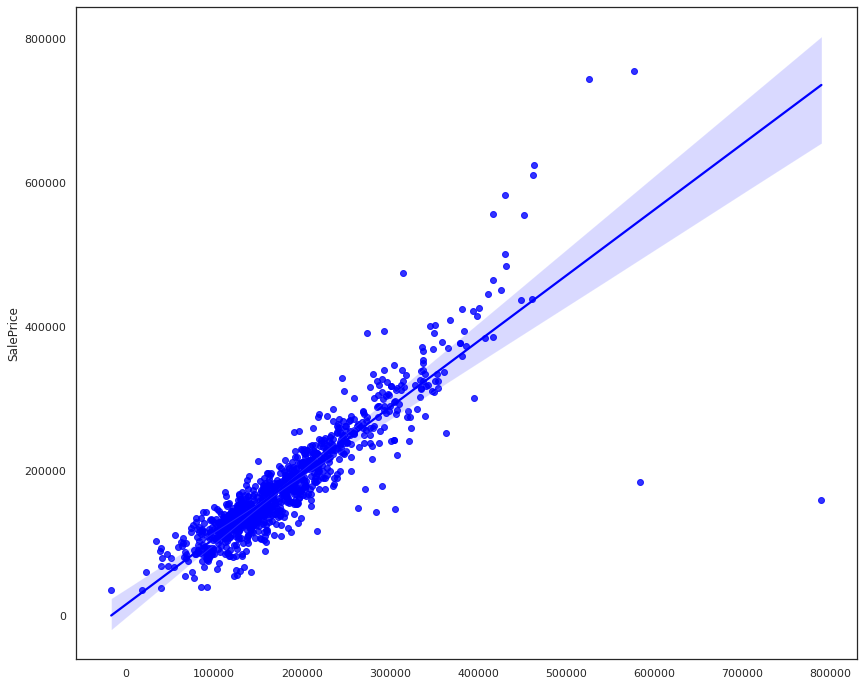

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 12))
ax = sns.regplot(x=lasso_predict, y=y_test, color="blue")



lasso_predict_1 = lasso.predict(val_draft)
#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': lasso_predict_1})
# you could use any filename. We choose submission here
kag_sub.to_csv('sub_LASSO_NOcv.csv', index=False)



Validate model prediction for unseen test data

In [ ]:
# model validation with test data
val_predict_2 = lasso.predict(val_data)
print(val_predict_2)

[ 83610.2508726  140327.37011424 150514.06689039 ... 144576.1392759
  82941.34628082 174644.2380258 ]


##Ridge

In [ ]:
# Ridge
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
              
ridge_train_pred = model_ridge.predict(X_train)
ridge_predict = model_ridge.predict(X_test)
ridge_predict

print('Root Mean Square Error train = ' + 
      str(np.sqrt(mean_squared_error(y_train, ridge_train_pred))))
print('Root Mean Square Error test = ' + 
      str(np.sqrt(mean_squared_error(y_test, ridge_predict)))) 



Ridge()

array([153492.79071235, 340818.71614435,  83857.03262732, ...,
       154632.36230933, 213290.12832272,  85219.31497601])

Root Mean Square Error train = 14783.914457504223
Root Mean Square Error test = 36580.87688839384


In [ ]:
print ('MAE:', mean_absolute_error(y_test, ridge_predict))
print ('MSE:', mean_squared_error(y_test, ridge_predict))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, ridge_predict)))

MAE: 19774.647499216768
MSE: 1338160553.9238265
RMSE: 36580.87688839384


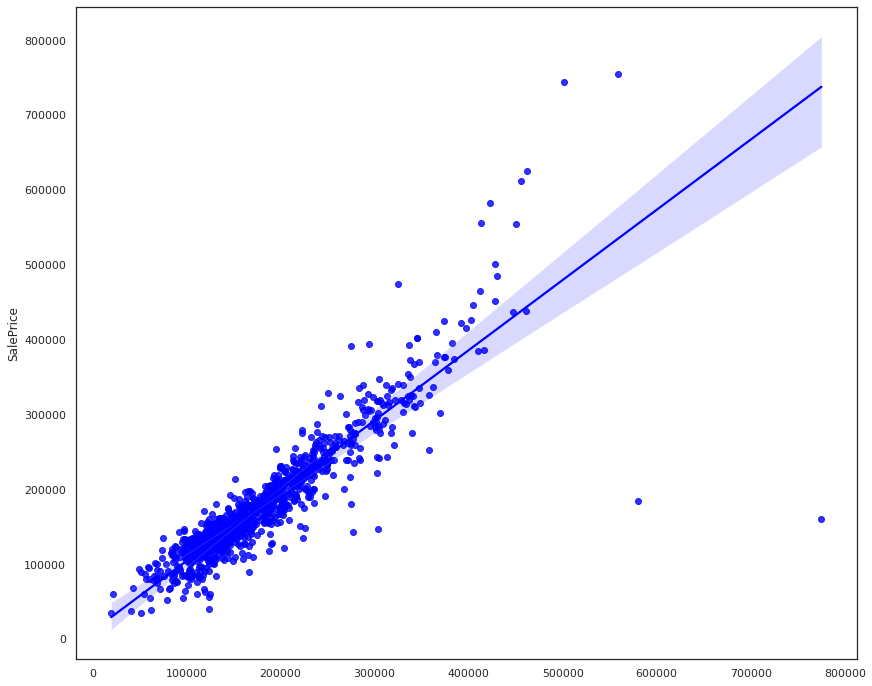

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 12))
ax = sns.regplot(x=ridge_predict, y=y_test, color="blue")




ridge_predict_1 = model_ridge.predict(val_draft)
#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': ridge_predict_1})
# you could use any filename. We choose submission here
kag_sub.to_csv('sub_RIDGE_NOcv.csv', index=False)


In [ ]:
# model validation with test data
val_predict_2 = model_ridge.predict(val_data)
print(val_predict_2)

[103533.9207973  167242.39153798 170409.02740885 ... 169532.70862347
 109780.07499106 201150.92379334]


## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

# Using X_train and y_train from last week
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
ElasticNet(random_state=0)
#print(regr.coef_)
#print(regr.intercept_)

# model validation with test data
elastic_predict = regr.predict(val_data)
print(elastic_predict)


#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': elastic_predict})
# you could use any filename. We choose submission here
kag_sub.to_csv('submission_elastic.csv', index=False)

#Evaluate model
y_pred = regr.predict(X_test)

y_pred

elastic_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root mean square error by elsastic",elastic_rmse)


print ('MAE:', mean_absolute_error(y_test, y_pred))
print ('MSE:', mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


ElasticNet(random_state=0)

ElasticNet(random_state=0)

[125547.06959169 173984.63139658 196371.10891734 ... 201970.05563053
 129339.18107443 236717.65851491]


array([139899.97199588, 306114.64573725, 102236.10874262, ...,
       185810.83716762, 235485.15085221, 111761.98224579])

Root mean square error by elsastic 38592.07924917876
MAE: 20813.509049610795
MSE: 1489348580.7748938
RMSE: 38592.07924917876


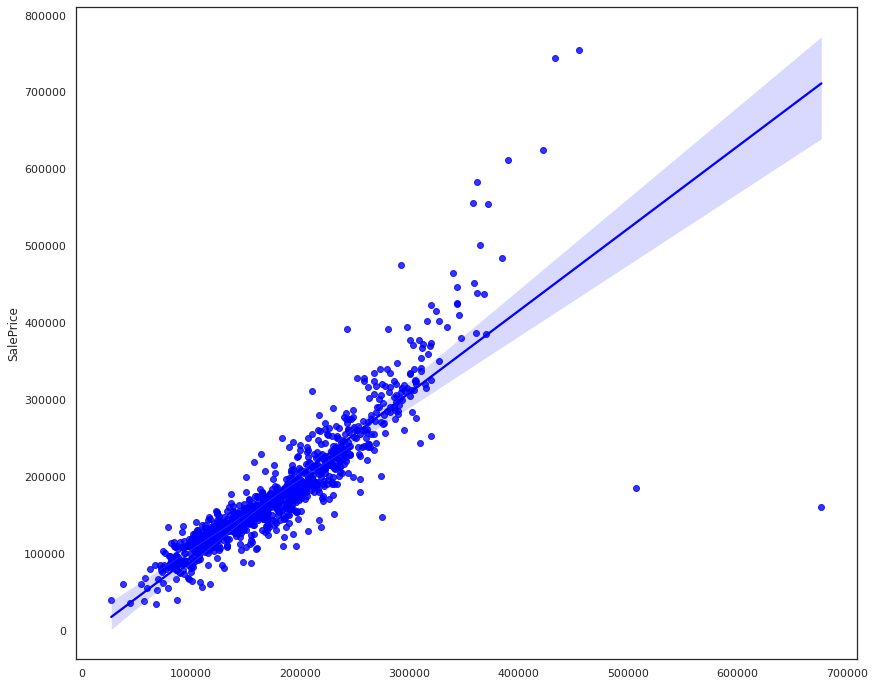

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (14, 12))

#plt.scatter(model1_predict, y_test,  color = 'blue')
#plt.xlabel('Sales Price predicted by the model')
#plt.ylabel('Actual SalesPrice of the house')
#plt.title('Linear Regression Model')
#plt.show()

ax = sns.regplot(x=y_pred, y=y_test, color="blue")



elastic_predict_1 = regr.predict(val_draft)
#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': elastic_predict_1})
# you could use any filename. We choose submission here
kag_sub.to_csv('sub_ELASTIC_NOcv.csv', index=False)


In [ ]:
# model validation with test data
val_predict_2 = regr.predict(val_data)
print(val_predict_2)

[125547.06959169 173984.63139658 196371.10891734 ... 201970.05563053
 129339.18107443 236717.65851491]


## W3 Modeling with Cross-Validation and RobustScaler




In [ ]:
X_draft.shape
val_draft.shape
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_draft, y, test_size = 0.7, random_state = 42)


(1460, 248)

(1459, 248)

In [ ]:
kfolds = KFold(n_splits=18, shuffle=True, random_state=42)

# RIDGE Regression
ridgecv = make_pipeline(RobustScaler(), RidgeCV(cv=kfolds)) 

# LASSO Regression
lassocv = make_pipeline(RobustScaler(), LassoCV(max_iter=7, 
                    random_state=42, cv=kfolds)) 

# Elastic Net Regression :
elasticnetcv = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=7, cv=kfolds))

lasso = Lasso()

ridge = Ridge()

elasticnet = ElasticNet(random_state=0)


# store models, scores and prediction values 
models = {
          'RidgeCV': ridgecv,
          'LassoCV': lassocv, 
          'ElasticNetCV': elasticnetcv,
          'Ridge': ridge,
          'Lasso': lasso,
          'ElasticNet': elasticnet
          }
predictions = {}
scores = {}

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 246851519.07055664, tolerance: 219140513.48486447

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 236742331.572937, tolerance: 219140513.48486447

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 256175238.78356934, tolerance: 219140513.48486447

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 296178082.33721924, tolerance: 219140

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lassocv',
                 LassoCV(cv=KFold(n_splits=18, random_state=42, shuffle=True),
                         max_iter=7, random_state=42))])

[106707.71429485 170134.46795536 179691.96043637 ... 178498.55130725
 113392.90055395 235102.81178476]
MAE: 19523.017980386365
MSE: 1350376364.904729
RMSE: 36747.467462462344


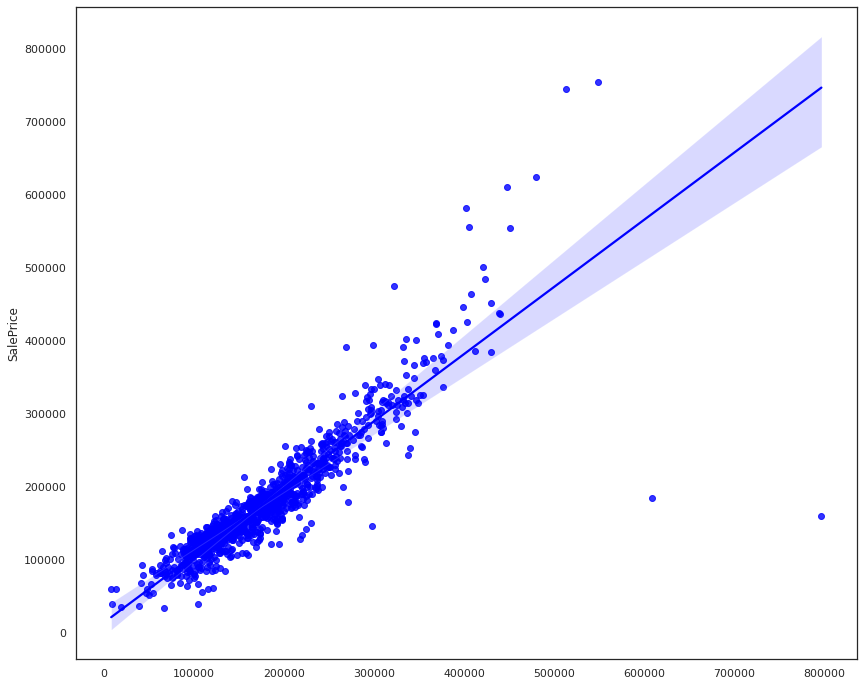

In [ ]:
# Lasso CV fit and predict

lassocv.fit(X_train_1, y_train_1)

lassoCV_predict = lassocv.predict(val_draft)
print(lassoCV_predict)


#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': lassoCV_predict})
# you could use any filename. We choose submission here
kag_sub.to_csv('submission_lassocv.csv', index=False)

y_pred_1 = lassocv.predict(X_test_1)
fig, ax = plt.subplots(1, 1, figsize = (14, 12))
ax = sns.regplot(x=y_pred_1, y=y_test_1, color="blue")

print ('MAE:', mean_absolute_error(y_test_1, y_pred_1))
print ('MSE:', mean_squared_error(y_test_1, y_pred_1))
print ('RMSE:', np.sqrt(mean_squared_error(y_test_1, y_pred_1)))





Pipeline(steps=[('robustscaler', RobustScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                         cv=KFold(n_splits=18, random_state=42, shuffle=True)))])

[106902.08093151 169694.13282327 177154.31416023 ... 180284.85875554
 111753.4738188  220984.11654398]
MAE: 18402.667041080524
MSE: 1291632183.284594
RMSE: 35939.284679645396


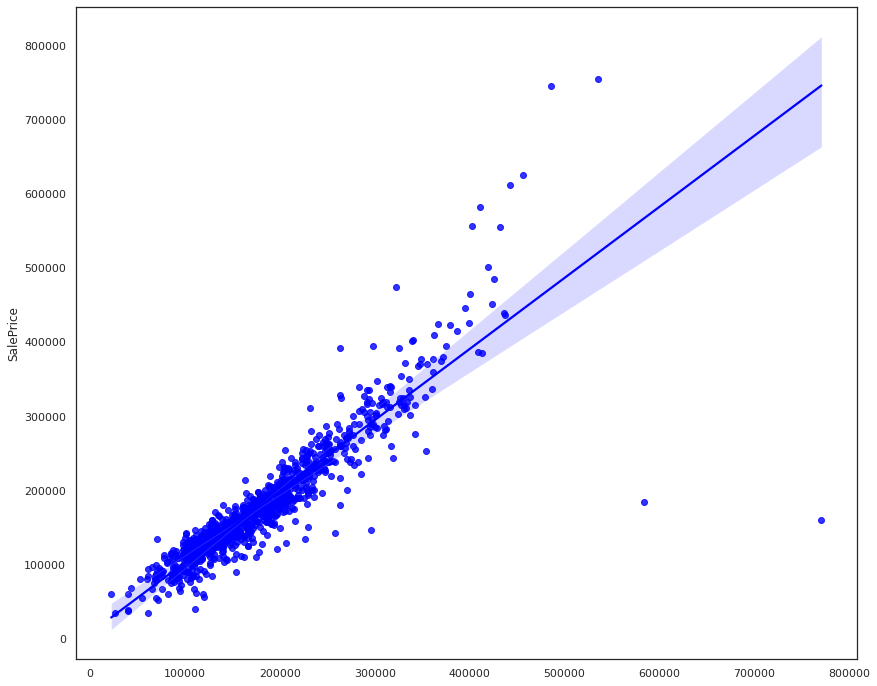

In [ ]:
# RIDGE CV fit and predict

ridgecv.fit(X_train_1, y_train_1)

ridgeCV_predict = ridgecv.predict(val_draft)
print(ridgeCV_predict)


#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': ridgeCV_predict})
# you could use any filename. We choose submission here
kag_sub.to_csv('submission_ridgecv.csv', index=False)

y_pred_1 = ridgecv.predict(X_test_1)
fig, ax = plt.subplots(1, 1, figsize = (14, 12))
ax = sns.regplot(x=y_pred_1, y=y_test_1, color="blue")

print ('MAE:', mean_absolute_error(y_test_1, y_pred_1))
print ('MSE:', mean_squared_error(y_test_1, y_pred_1))
print ('RMSE:', np.sqrt(mean_squared_error(y_test_1, y_pred_1)))

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnetcv',
                 ElasticNetCV(cv=KFold(n_splits=18, random_state=42, shuffle=True),
                              max_iter=7))])

[174515.14541485 177956.82841321 182811.26112209 ... 181773.16414925
 175277.29695458 185180.95461027]
MAE: 54166.00997332806
MSE: 5928978706.813096
RMSE: 76999.86173242843


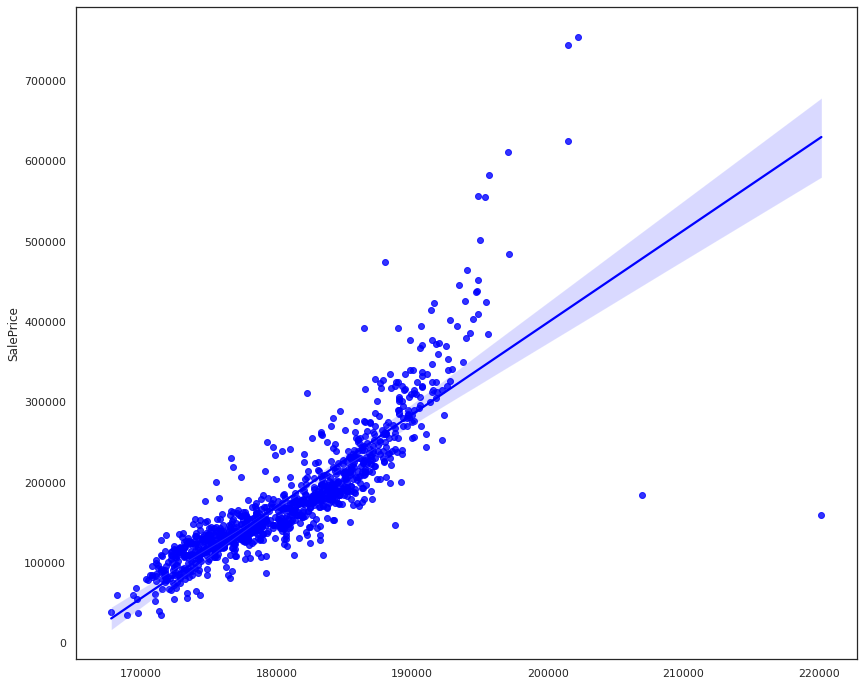

In [ ]:
# elasticnet CV fit and predict

elasticnetcv.fit(X_train_1, y_train_1)

elasticCV_predict = elasticnetcv.predict(val_draft)
print(elasticCV_predict)


#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': elasticCV_predict})
# you could use any filename. We choose submission here
kag_sub.to_csv('submission_elasticcv.csv', index=False)

y_pred_1 = elasticnetcv.predict(X_test_1)
fig, ax = plt.subplots(1, 1, figsize = (14, 12))
ax = sns.regplot(x=y_pred_1, y=y_test_1, color="blue")

print ('MAE:', mean_absolute_error(y_test_1, y_pred_1))
print ('MSE:', mean_squared_error(y_test_1, y_pred_1))
print ('RMSE:', np.sqrt(mean_squared_error(y_test_1, y_pred_1)))

In [ ]:
# def cv_rmse(model, X=X_train_1):
#   rmse = np.sqrt(-cross_val_score(model, X_train_1, y_train_1,scoring="neg_mean_squared_error",cv=kfolds))
#   return (rmse)
    
# for name, model in models.items():
#   print('model = ',model,'\t', 'name = ',name)
#   model.fit(X_train_1, y_train_1)
#   #predictions[name] = np.expm1(model.predict(X_train_1))
#   predictions[name] = model.predict(val_data)
    
#   score = cv_rmse(model, X=X_train_1)
#   scores[name] = (score.mean(), score.std())


#   #kaggle submission
#   kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predictions[name]})
#   # you could use any filename. We choose submission here
#   kag_sub.to_csv('sub_'+ name, index=False)

## W3 Modeling with Cross-Validation and NO Scaling




In [ ]:
X_draft.shape
val_draft.shape
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_draft, y, test_size = 0.7, random_state = 42)


(1460, 248)

(1459, 248)

In [ ]:
# RIDGE 



kfolds = KFold(n_splits=18, shuffle=True, random_state=42)

# RIDGE Regression: Kfold cross-validation
ridgecv = make_pipeline(RidgeCV(cv=kfolds)) 

# LASSO Regression: Kfold cross-validation
lassocv = make_pipeline(LassoCV(max_iter=7, 
                    random_state=42, cv=kfolds)) 

# Elastic Net Regression: Kfold cross-validation
# Hyperparameters: max_iter=7, cv=kfolds
elasticnetcv = make_pipeline(ElasticNetCV(max_iter=7, 
                          cv=kfolds)) 
lasso = Lasso()

ridge = Ridge()


# store models, scores and prediction values 
models = {
          'RidgeCV': ridgecv,
          'LassoCV': lassocv, 
          'ElasticNetCV': elasticnetcv,
          'Ridge': ridge,
          'Lasso': lasso,
          'ElasticNet': elasticnet
          }
predictions = {}
scores = {}

In [ ]:
# Lasso CV fit and predict

lassocv.fit(X_train_2, y_train_2)

lassoCV_predict = lassocv.predict(val_draft)
print(lassoCV_predict)


#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': lassoCV_predict})
# you could use any filename. We choose submission here
kag_sub.to_csv('sub_noscale_lassocv.csv', index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 544066692.2537842, tolerance: 219140513.48486447

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 573127084.8214111, tolerance: 219140513.48486447

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 722985995.5148926, tolerance: 219140513.48486447

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 904547129.5675049, tolerance: 21914051

Pipeline(steps=[('lassocv',
                 LassoCV(cv=KFold(n_splits=18, random_state=42, shuffle=True),
                         max_iter=7, random_state=42))])

[126170.08992731 169552.70974964 206502.12234983 ... 202331.92015192
 119049.53416381 240824.48966911]


In [ ]:
# RIDGE CV fit and predict

ridgecv.fit(X_train_2, y_train_2)

ridgeCV_predict = ridgecv.predict(val_draft)
print(ridgeCV_predict)


#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': ridgeCV_predict})
# you could use any filename. We choose submission here
kag_sub.to_csv('sub_noscale_ridgecv.csv', index=False)

Pipeline(steps=[('ridgecv',
                 RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                         cv=KFold(n_splits=18, random_state=42, shuffle=True)))])

[108817.96456808 172637.76086533 178464.6100773  ... 180854.46525862
 111911.78791947 222771.94013976]


In [ ]:
# elasticnet CV fit and predict

elasticnetcv.fit(X_train_2, y_train_2)

elasticCV_predict = elasticnetcv.predict(val_draft)
print(elasticCV_predict)


#kaggle submission
kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': elasticCV_predict})
# you could use any filename. We choose submission here
kag_sub.to_csv('sub_noscale_elasticcv.csv', index=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 219622756.3881836, tolerance: 219140513.48486447

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 220585184.32617188, tolerance: 219140513.48486447

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 219589946.9104004, tolerance: 219140513.48486447

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 226350219.89959717, tolerance: 219140

Pipeline(steps=[('elasticnetcv',
                 ElasticNetCV(cv=KFold(n_splits=18, random_state=42, shuffle=True),
                              max_iter=7))])

[133635.26740018 188961.57125098 188195.27683644 ... 192059.78243701
 110116.32382804 225900.29608057]


In [ ]:
# # get the performance of each model on training data(validation set)
# print('---- Score with CV_RMSLE-----')
# score = cv_rmse(ridgecv)
# print("Ridge score with Cross validation: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# score = cv_rmse(lassocv)
# print("Lasso score with Cross validation: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# score = cv_rmse(elasticnetcv)
# print("ElasticNet score with Cross validation: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# score = cv_rmse(ridge)
# print("Ridge score without Cross validation: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# score = cv_rmse(lasso)
# print("Lasso score without Cross validation: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# score = cv_rmse(elasticnet)
# print("ElasticNet score without Cross validation: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': val_predict_1})
# # you could use any filename. We choose submission here
# kag_sub.to_csv('submission_lr.csv', index=False)

## ElasticNet Hyperparameter Tuning

In [120]:
# Elastic Net Regression
elasticnetcv1 = make_pipeline(RobustScaler(), ElasticNetCV(cv=kfolds, copy_X=True, fit_intercept=True, l1_ratio=0.5, 
                          max_iter=1000, normalize=True, positive=False, precompute=False,
                          random_state=None, selection='cyclic', tol=0.0001))

# elasticnet CV fit and predict after scaling

elasticnetcv1.fit(X_train_1, y_train_1)

elasticCV1_predict = elasticnetcv1.predict(val_draft)
print(elasticCV1_predict)


kag_sub = pd.DataFrame({'Id': test_df.Id, 'SalePrice': elasticCV1_predict})
# you could use any filename. We choose submission here
kag_sub.to_csv('sub_elastic_tune.csv', index=False)



Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnetcv',
                 ElasticNetCV(cv=KFold(n_splits=18, random_state=42, shuffle=True),
                              normalize=True, precompute=False))])

[180059.66881356 180515.92195951 181358.34837519 ... 180876.10958933
 180169.21226907 181550.58304976]


# Kaggle Submission

Kaggle username: pp1702

##W3 Submission Score
 - Lasso, Ridge and Elastic (After Scaling and Cross-Validation)

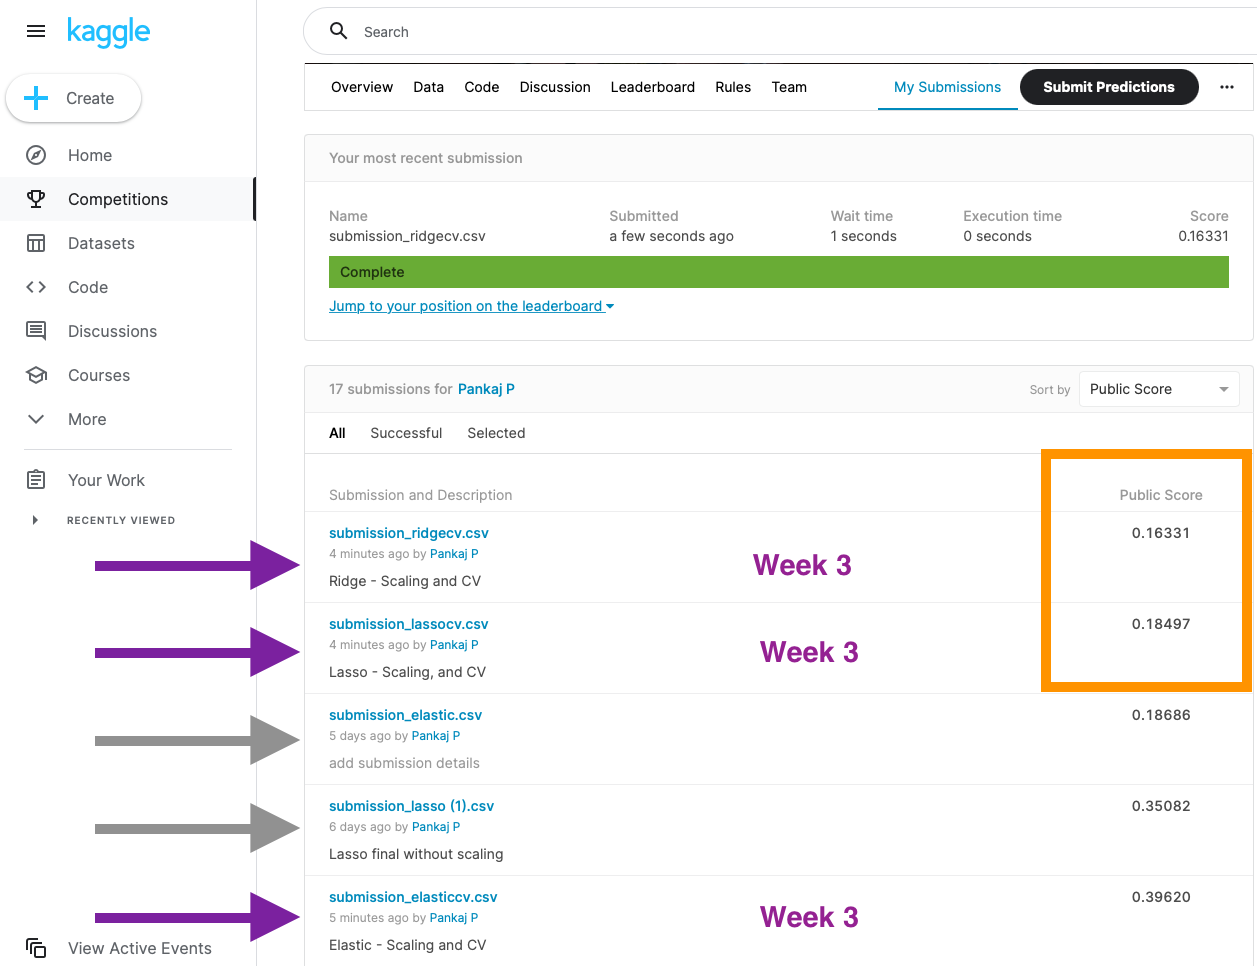





#Conclusion


 - **Scaling:** RobustScaler outperformed StandardScaler and MinMaxScaler for the dataset I have been working on.
 - **Cross-validation:** techniques like K-fold cross-validation randomly partitions the dataset into k subsets and the model is trained k times with each subset.
 - **Ridge(CV):** Regression when combined with K-fold cross-validation outperforms all the techniques used so far in the course. 
 - **Elastic Net Hyperparameter:** As we know, Elastic net is the compromise between ridge regression and lasso regularization, and it is best suited for modeling data with a large number of highly correlated predictors.
 - **Tuning Elastic Net Hyperparameters:** We tried different parameters to tune the elasticnet, like l1_ratio, increased iteration to 1000, normalize as True, and selection as cyclic



#References:

https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/

https://jekel.me/piecewise_linear_fit_py/index.html

https://machinelearningmastery.com/elastic-net-regression-in-python/

https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b58

